<div style='text-align: center; padding: 30px'>
  <h1><strong>Preparación de los Datos y Análisis de Datos</strong></h1>
  <h3><strong>Heri</strong></h1>
</div>

**Objetivo**

Realizar el proceso de preparación de datos del modelo CRISP-DM y aplicar un proceso de análisis de datos.

**Instrucciones**

1. Elige un tema de análisis basado en los datos de ENSANUT 2023.
2. Diseña una ruta de trabajo para realizar el análisis propuesto (20%).
3. Realiza el análisis de datos y presenta tus resultados (80%).

**Nota**  

La preparación de datos debe incluir:
- Proceso de limpieza de datos.
- Estandarización, normalización o transformación de datos.
- Imputación de valores faltantes usando `KKImputer` o `SimpleImputer` de `sklearn`.

El análisis de datos debe incluir:  
- Árbol de decisión.
- Prueba de chi2.
- Histogramas univariados o bivariados con KDE.
- Visualización de datos (por lo menos 2 gráficas diferentes).


**Entregables**  

- Ruta de trabajo (máximo 2 cuartillas). Entregar antes del 11 de marzo a las 23:59 horas.
- Reporte del proceso de preparación de datos explicando el proceso de limpieza y transformación de datos. Debes incluir aquellas variables donde se hayan identificado valores faltantes y el tipo de valor faltante (MCAR; NMCAR, MAR).
- Una presentación de 10 minutos explicando los resultados del análisis (19 de marzo).

In [700]:
import pandas as pd
import json

Era mucho texto y lo puse bonito

# **Data**

no necesitamos todas las variables, solo las que vamos a usar

•	Edad de la persona del integrante de hogar: H0303  
•	Parentingresoso del integrante del hogar: H0305  
•	Lugar de nacimiento del integrante de hogar: H0306  
•	Habla alguna lengua indígena y/o español el integrante de hogar: H0311, H0312  
•	Nivel y grado de ingresosolaridad del integrante de hogar: H0317A y H0317G.  
•	Alfabetismo del integrante de hogar: H0318  
•	Ingresos en el hogar: H0327.  

•	Sobrepeso u obesidad. Variable “A0104”.  
•	Dieta alta en azúcares y carbohidratos refinados. Solo se le pregunto a personas que padecían alguna enfermedad.  
•	Sedentarismo. Se puede conocer a través de la pregunta “A0107” Si ganaron o perdieron peso.  
•	Antecedentes familiares de diabetes tipo 2. “A0701P”, “A0701M”, “A0701PH”.	  
•	Hipertensión o colesterol alto. Si contestaron que no tienen diabetes no hay registro.  
•	Síndrome de ovario poliquístico (en mujeres). No hay información.  

In [701]:
pd.set_option('display.max_columns', None)

In [702]:
# mergefull = pd.read_csv('mergefull.csv')
# diabetesyocupacion = mergefull[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0312', 'h0317a', 'h0317g', 'h0318', 'h0319', 'h0327', 'h0321', 'h0322', 'h0323', 'h0324',    'a0104', 'a0107', 'a0701p', 'a0701m', 'a0701h', 'a0301a', 'a0301']]
# diabetesyocupacion.to_csv('Diabetes-y-Ocupacion.csv', index=False)

In [703]:
data = pd.read_csv('Diabetes-y-Ocupacion.csv')

### **Nombres de los plots**

In [704]:
# Leer el archivo JSON
with open('dictcat.json', 'r') as fp:
    dictcat = json.load(fp)

### **Etiquetas para los histogramas**

In [705]:
# Leer el archivo JSON
with open('diccionario_etiquetas.json', 'r') as file:
    diccionario_etiquetas = json.load(file)

# **Plots**

In [706]:
from cute_plots import * # laboratorio pasado

In [707]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [708]:
plot = CutePlots(data, dictcat, diccionario_etiquetas, 'dark')

In [709]:
    # def histograma(self, column, colnum, kde=False, bins='auto', numerito=False, kde_color=None):
    #     return histograma(column, self.mergefull, self.dictcat, self.palette, colnum, kde, bins, numerito, kde_color)

# **Laboratorio**

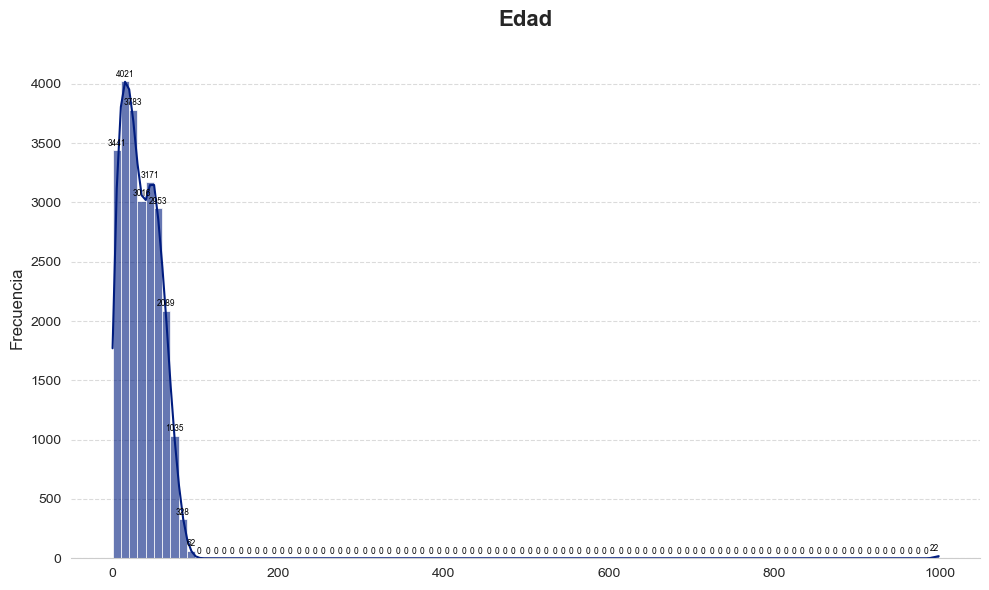

In [710]:
plot.histograma('h0303', 0, kde=True, bins=100, numerito=True)

In [711]:
# drop column if h0303 is more than 115
data = data.drop(data[data['h0303'] > 115].index)
plot = CutePlots(data, dictcat, diccionario_etiquetas, 'dark')

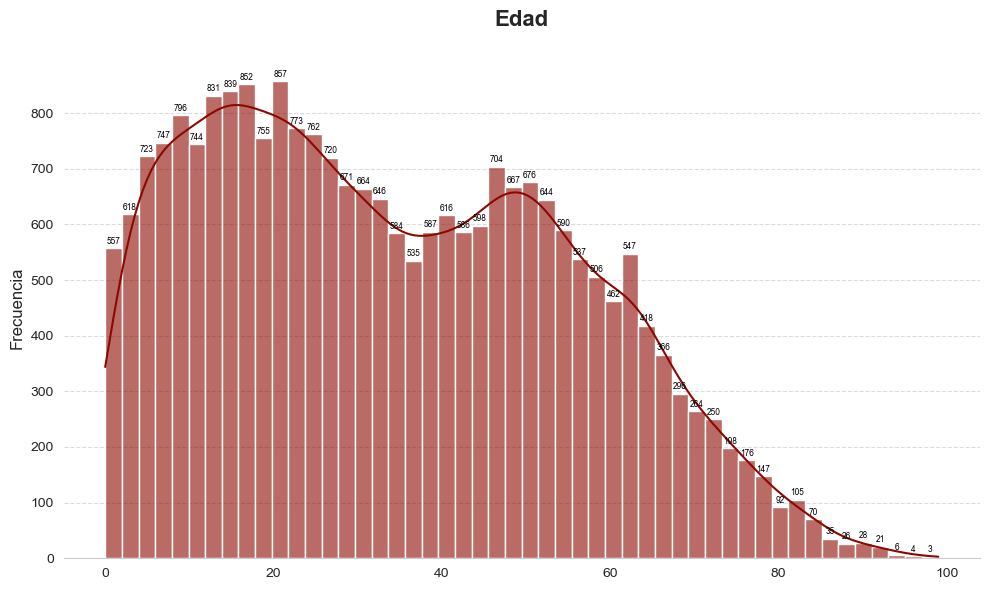

In [712]:
plot.histograma('h0303', 3, kde=True, bins=50, numerito=True)

# **Ocupación (árbol)**

In [713]:
import numpy as np

In [714]:
data

h0303  h0305  h0306  h0307  h0308 h0311 h0312 h0317a h0317g h0318  \
0         47      1      2      3      2     2            3      3         
1         41      2      1      2      3     2            2      6     1   
2         20      3      1      1      1     2           10      3         
3         17      3      1      1      1     2            4      2         
4         11      3      1      1      1     2            2      6     1   
...      ...    ...    ...    ...    ...   ...   ...    ...    ...   ...   
23916     17      3      1      1      2     2            4      3         
23917     15      3      1      1      2     2            4      1         
23918     40      1      1      2      3     2           10      4         
23919     13      3      2      2      1     2            3      2         
23920     55      1      1      2      2     2           10      4         

      h0319  h0327 h0321 h0322 h0323 h0324  a0104  a0107  a0701p  a0701m  \
0         6      3     1                 1      8      1       2       1   
1         6      3     2     6     2            8      1       2       1   
2         7      3     2     6     3            8      1       2       1   
3         7      3     1                 1      8      1       2       1   
4                3                              8      1       2       1   
...     ...    ...   ...   ...   ...   ...    ...    ...     ...     ...   
23916     7      2     2     6     3            6      3       2       2   
23917     7      2     2     6     3            6      3       2       2   
23918     2      8     1                 1      6      1       2       2   
23919     7      8     2     6     3            6      1       2       2   
23920     3      4     1                 1      6      1       2       2   

      a0701h  a0301a  a0301  
0          2       2      3  
1          2       2      3  
2          2       2      3  
3          2       2      3  
4          2       2      3  
...      ...     ...    ...  
23916      2       2      3  
23917      2       2      3  
23918      2       2      3  
23919      2       2      3  
23920      2       2      3  

[23899 rows x 23 columns]

In [715]:
data['h0307'].apply(lambda x: np.nan if x == 99 else x)

0        3
1        2
2        1
3        1
4        1
        ..
23916    1
23917    1
23918    2
23919    2
23920    2
Name: h0307, Length: 23899, dtype: int64

## **Transformación de los Datos**

In [716]:
ocupacion = data[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0312', 'h0317a', 'h0317g', 'h0318', 'h0327', 'h0321', 'h0322', 'h0323', 'h0324']]

In [717]:
# count the number of NaN values in each column

# !!! NO LO PODEMOS PASAR A NUMERICO PORQUE LOS PLOTS DEJAN DE FUNCIONAR !!!
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0312     23212
h0317a      854
h0317g     2060
h0318     16050
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324     12471
dtype: int64


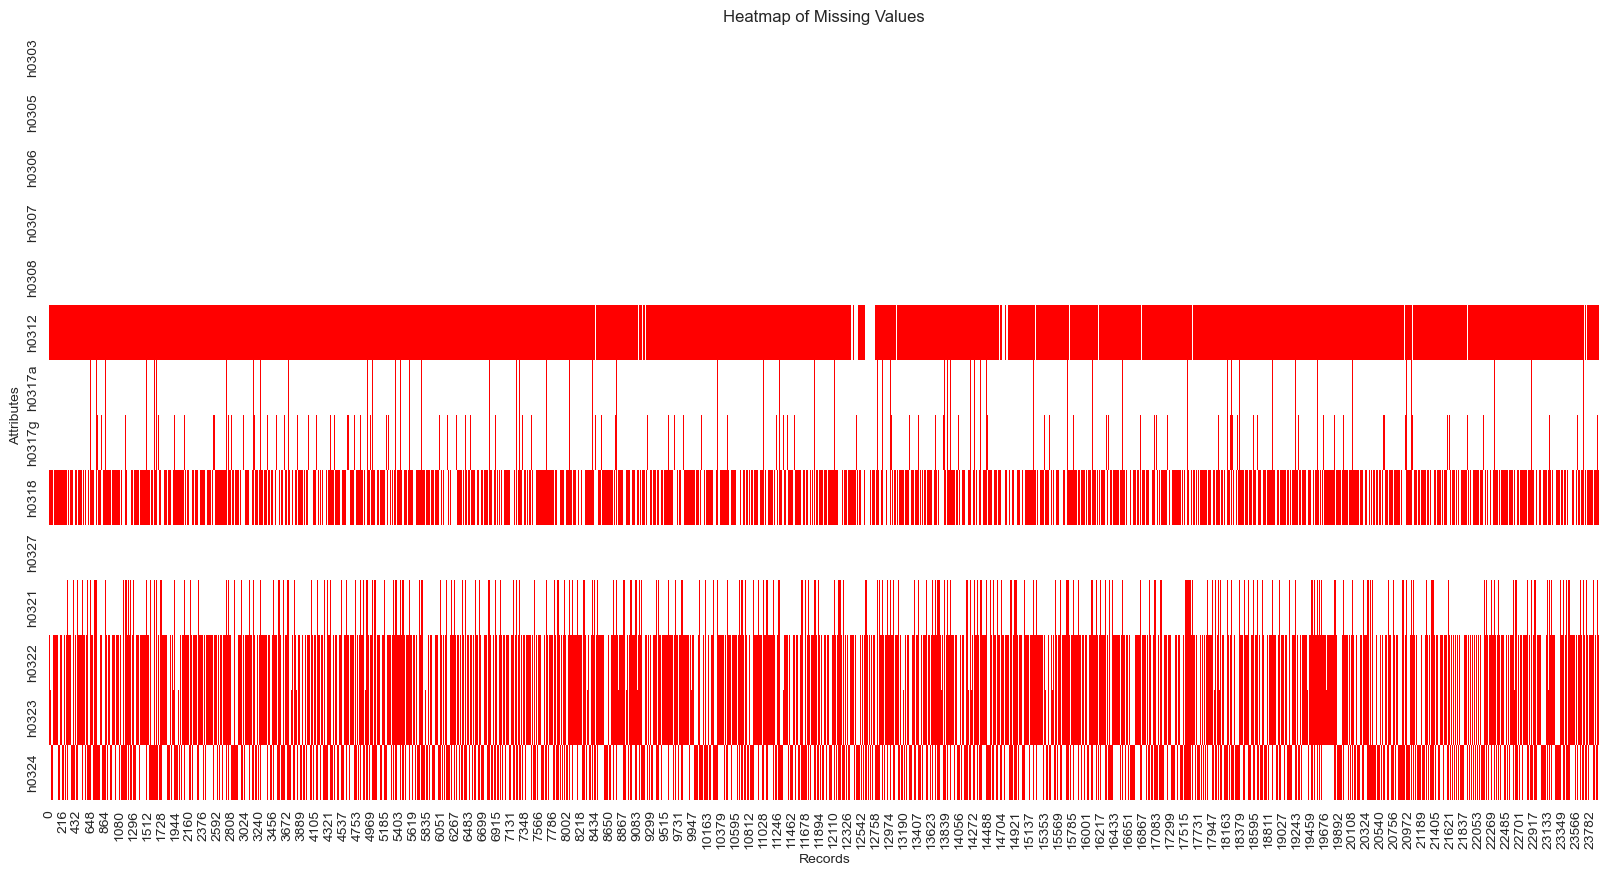

In [718]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boolean DataFrame where True indicates ' ' values
missing_values = ocupacion == ' '

# Plot the heatmap with grid lines
plt.figure(figsize=(20, 10))
sns.heatmap(missing_values.T, cmap=['white', 'red'], cbar=False, linecolor='black')
plt.xlabel('Records')
plt.ylabel('Attributes')
plt.title('Heatmap of Missing Values')
plt.show()


In [719]:
# if they dont speak indigena, they speak spanish
ocupacion.loc[:, 'h0312'] = ocupacion['h0312'].replace(' ', '1')

# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())


h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0312         0
h0317a      854
h0317g     2060
h0318     16050
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324     12471
dtype: int64


In [720]:
# if they didnt answer the question, they know how to read and write
# (the ones that didnt answer went to school, and skipped the question)
ocupacion['h0318'] = ocupacion['h0318'].replace(' ', '1')


# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0312         0
h0317a      854
h0317g     2060
h0318         0
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324     12471
dtype: int64


C:\Users\herie\AppData\Local\Temp\ipykernel_20444\4023124364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion['h0318'] = ocupacion['h0318'].replace(' ', '1')


In [721]:
# Son los que estan como dingresosonocidos porque contestaron que hacian en la H02323
ocupacion.loc[ocupacion['h0323'] == '1', 'h0324'] = 'Busco Trabajo'
ocupacion.loc[ocupacion['h0323'] == '2', 'h0324'] = 'Quehaceres del hogar'
ocupacion.loc[ocupacion['h0323'] == '3', 'h0324'] = 'Estudiante'
ocupacion.loc[ocupacion['h0323'] == '4', 'h0324'] = 'Jubilado o pensionado'
ocupacion.loc[ocupacion['h0323'] == '5', 'h0324'] = 'Incapacitado'
ocupacion.loc[ocupacion['h0323'] == '6', 'h0324'] = 'Otra situación'

# Pasamos de numerico a categorico
ocupacion.loc[ocupacion['h0324'] == '1', 'h0324'] = 'Empleado'
ocupacion.loc[ocupacion['h0324'] == '2', 'h0324'] = 'Obrero'
ocupacion.loc[ocupacion['h0324'] == '3', 'h0324'] = 'Jornalero o peón'
ocupacion.loc[ocupacion['h0324'] == '4', 'h0324'] = 'Trabajador por su cuenta'
ocupacion.loc[ocupacion['h0324'] == '5', 'h0324'] = 'Patrón o empleador'
ocupacion.loc[ocupacion['h0324'] == '6', 'h0324'] = 'Trabajador sin pago'
ocupacion.loc[ocupacion['h0324'] == '7', 'h0324'] = 'Otra situación'

# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0312         0
h0317a      854
h0317g     2060
h0318         0
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324      4185
dtype: int64


In [722]:
# because we only care about the occupation, we will drop the other columns
ocupacion.drop(columns=['h0321', 'h0322', 'h0323'], inplace=True)

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\3561635030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion.drop(columns=['h0321', 'h0322', 'h0323'], inplace=True)


In [723]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303        0
h0305        0
h0306        0
h0307        0
h0308        0
h0312        0
h0317a     854
h0317g    2060
h0318        0
h0327        0
h0324     4185
dtype: int64


# **A LOT OF NANS IN H0317A, WE WILL PREDICT IT**

# **DECISION TREE TO ESCOLARIDAD**

Because it has a lot of categorical values

In [724]:
escolaridad = ocupacion[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0312', 'h0318', 'h0327', 'h0317a']]

In [725]:
escolaridad

h0303  h0305  h0306  h0307  h0308 h0312 h0318  h0327 h0317a
0         47      1      2      3      2     1     1      3      3
1         41      2      1      2      3     1     1      3      2
2         20      3      1      1      1     1     1      3     10
3         17      3      1      1      1     1     1      3      4
4         11      3      1      1      1     1     1      3      2
...      ...    ...    ...    ...    ...   ...   ...    ...    ...
23916     17      3      1      1      2     1     1      2      4
23917     15      3      1      1      2     1     1      2      4
23918     40      1      1      2      3     1     1      8     10
23919     13      3      2      2      1     1     1      8      3
23920     55      1      1      2      2     1     1      4     10

[23899 rows x 9 columns]

In [726]:
print(escolaridad.apply(lambda x: x == ' ').sum())

h0303       0
h0305       0
h0306       0
h0307       0
h0308       0
h0312       0
h0318       0
h0327       0
h0317a    854
dtype: int64


In [727]:
# decition tree to predict h0317a
from sklearn.tree import DecisionTreeClassifier

In [728]:
# escolaridad_train are the rows that are not ' ' in h0317a
escolaridad_train = escolaridad[escolaridad['h0317a'] != ' ']

x_train = escolaridad_train.drop('h0317a', axis=1)
y_train = escolaridad_train['h0317a']

escolaridad_pred = escolaridad[escolaridad['h0317a'] == ' ']

x_pred = escolaridad_pred.drop('h0317a', axis=1)
y_pred = escolaridad_pred['h0317a']

# Create Decision Tree classifer object
clf = DecisionTreeClassifier() # it is us

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_pred)

# count the number of NaN values in each column
# replace the predicted values in the original dataframe
ocupacion.loc[ocupacion['h0317a'] == ' ', 'h0317a'] = y_pred

In [729]:
mergefull['a1213'].unique()

array([3, 1, 2], dtype=int64)

In [730]:
# # plot the decision tree
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))
# plot_tree(clf, filled=True, feature_names=x_train.columns)
# plt.savefig('decision_tree.svg')
# plt.show()

In [731]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303        0
h0305        0
h0306        0
h0307        0
h0308        0
h0312        0
h0317a       0
h0317g    2060
h0318        0
h0327        0
h0324     4185
dtype: int64


# **$\text{yupi}$**

In [732]:
edad_inicio = {
    '0': 0,   # Ninguno
    '1': 3,   # Preescolar (inicia alrededor de los 3 años)
    '2': 6,   # Primaria (inicia alrededor de los 6 años)
    '3': 12,  # Secundaria (inicia alrededor de los 12 años)
    '4': 15,  # Preparatoria, bachillerato (inicia alrededor de los 15 años)
    '5': 18,  # Normal básica (formación para docentes con preparatoria terminada)
    '6': 12,  # Estudios técnicos o comerciales con primaria terminada
    '7': 15,  # Estudios técnicos o comerciales con secundaria terminada
    '8': 18,  # Estudios técnicos o comerciales con preparatoria terminada
    '9': 19,  # Normal licenciatura (docentes con grado de licenciatura, después de prepa)
    '10': 18, # Licenciatura o profesional (suele iniciar alrededor de los 18 años)
    '11': 23, # Maestría (después de licenciatura, normalmente inicia a los 23)
    '12': 25  # Doctorado (suele iniciar a los 25, después de la maestría)
}

ocupacion.loc[:, 'h0317aint'] = ocupacion['h0317a'].map(edad_inicio)

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\4158856556.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion.loc[:, 'h0317aint'] = ocupacion['h0317a'].map(edad_inicio)


## h0317 will be a new variable that will be the sum of h0317a and h0317g
## h0317 is the total years of study (on awerage)

In [733]:
# create a new column with the integer version of h0317g
ocupacion.loc[:, 'h0317gint'] = pd.to_numeric(ocupacion['h0317g'], errors='coerce')

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\4241137259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion.loc[:, 'h0317gint'] = pd.to_numeric(ocupacion['h0317g'], errors='coerce')


In [734]:
mediana = ocupacion.groupby('h0317a')['h0317gint'].median()
mediana.replace(np.nan, 0, inplace=True)
mediana

h0317a
0     0.0
1     2.0
10    4.0
11    2.0
12    3.0
2     5.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
Name: h0317gint, dtype: float64

In [735]:
# fill the NaN values in h0317gint with the median
ocupacion.loc[:, 'h0317gint'] = ocupacion['h0317gint'].fillna(ocupacion['h0317aint'].map(mediana))

In [736]:
# h0317 will be the time that the person studied
ocupacion.loc[:, 'h0317'] = ocupacion['h0317aint'] + ocupacion['h0317gint']

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\1731124644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion.loc[:, 'h0317'] = ocupacion['h0317aint'] + ocupacion['h0317gint']


In [737]:
# change NaN of h0317 to 0
ocupacion.loc[:, 'h0317'] = ocupacion['h0317'].fillna(0)

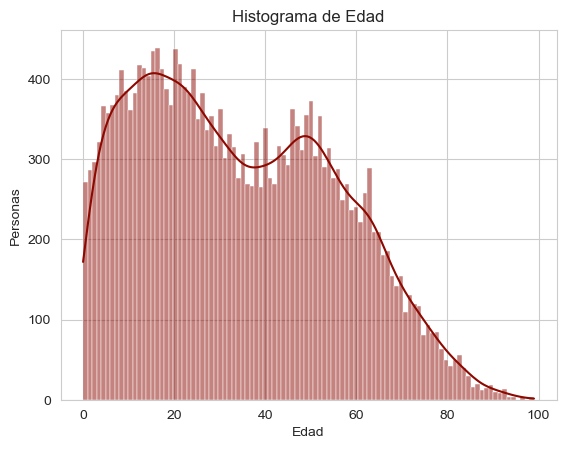

In [738]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram plot
ax = sns.histplot(ocupacion['h0303'], bins=100, kde=True, color=sns.color_palette('dark')[3], kde_kws={'bw_adjust': 1})
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.title('Histograma de Edad')

plt.savefig('histograma-anos-de-estudio.svg')
plt.show()


In [739]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303           0
h0305           0
h0306           0
h0307           0
h0308           0
h0312           0
h0317a          0
h0317g       2060
h0318           0
h0327           0
h0324        4185
h0317aint       0
h0317gint       0
h0317           0
dtype: int64


# **KNN TO INGRESOS**

In [740]:
# esc de escolaridad
ingresos = ocupacion[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0312', 'h0317', 'h0318', 'h0327']]

In [741]:
ocupacion[ocupacion['h0303'] == 0]

h0303  h0305  h0306  h0307  h0308 h0312 h0317a h0317g h0318  h0327  \
46         0      4      1      1      2     1      0            1      2   
346        0      3      3      1      1     1      0            1      2   
495        0      3      1      1      1     1      0            1      2   
523        0      4      1      1      2     1      0            1      2   
541        0      4      1      1      2     1      0            1      4   
...      ...    ...    ...    ...    ...   ...    ...    ...   ...    ...   
23199      0      4      1      1      1     1      1            1      3   
23583      0      3      1      1      1     1      0            1      2   
23678      0      4      1      1      1     1      0            1      2   
23716      0      3      1      1      1     1      0            1      2   
23774      0      4      1      1      1     1      1            1      3   

      h0324  h0317aint  h0317gint  h0317  
46                   0        NaN    0.0  
346                  0        NaN    0.0  
495                  0        NaN    0.0  
523                  0        NaN    0.0  
541                  0        NaN    0.0  
...     ...        ...        ...    ...  
23199                3        NaN    0.0  
23583                0        NaN    0.0  
23678                0        NaN    0.0  
23716                0        NaN    0.0  
23774                3        NaN    0.0  

[271 rows x 14 columns]

In [742]:
from scipy import stats

# Aplicar transformación Yeo-Johnson para reducir la asimetría
ingresos['h0303'], _ = stats.yeojohnson(ingresos['h0303'])

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\3790299742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['h0303'], _ = stats.yeojohnson(ingresos['h0303'])


In [743]:
ingresos = pd.get_dummies(ingresos, columns=['h0305'], prefix='h0305')    # one hot encoding paretnesco
ingresos = pd.get_dummies(ingresos, columns=['h0306'], prefix='h0306')    # one hot encoding nacimiento
ingresos = pd.get_dummies(ingresos, columns=['h0307'], prefix='h0307')    # one hot encoding madre
ingresos = pd.get_dummies(ingresos, columns=['h0308'], prefix='h0308')    # one hot encoding padre
ingresos = pd.get_dummies(ingresos, columns=['h0312'], prefix='h0312')    # one hot encoding español
ingresos = pd.get_dummies(ingresos, columns=['h0318'], prefix='h0318')    # one hot encoding leer y escribir

In [744]:
ingresos['h0327'].value_counts()

h0327
1    8075
2    7235
3    4200
4    1893
8     779
5     756
9     742
6     219
Name: count, dtype: int64

In [745]:
predict_data = ingresos[ingresos['h0327'].isin([8, 9])]

In [746]:
train_data = ingresos[ingresos['h0327'].isin([1, 2, 3, 4, 5, 6, 7])]

In [747]:
x_train = train_data.drop('h0327', axis=1)
y_train = train_data['h0327']

x_pred = predict_data.drop('h0327', axis=1)
y_pred = predict_data['h0327']

In [748]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo con los datos de entrenamiento
knn.fit(x_train, y_train)

# Predecir la respuesta para los datos de prueba
y_pred = knn.predict(x_pred)


In [749]:
# asignar los valores predichos al dataframe original
ingresos.loc[ingresos['h0327'].isin([8,9]), 'h0327'] = y_pred

In [750]:
ingresos['h0327'].value_counts()

h0327
1    8710
2    7665
3    4468
4    2024
5     810
6     222
Name: count, dtype: int64

In [751]:
# asignar los valores predichos al dataframe original
ocupacion.loc[ocupacion['h0327'].isin([8,9]), 'h0327'] = y_pred

In [752]:
ocupacion['h0327'].value_counts()

h0327
1    8710
2    7665
3    4468
4    2024
5     810
6     222
Name: count, dtype: int64

In [753]:
ocupacion.apply(lambda x: x == ' ').sum()

h0303           0
h0305           0
h0306           0
h0307           0
h0308           0
h0312           0
h0317a          0
h0317g       2060
h0318           0
h0327           0
h0324        4185
h0317aint       0
h0317gint       0
h0317           0
dtype: int64

# **KNN TO OCUPACION**

In [754]:
# esc de escapar
esc = ocupacion[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0312', 'h0317', 'h0318', 'h0327', 'h0324']]

esc['h0303'], _ = stats.yeojohnson(esc['h0303'])
esc = pd.get_dummies(esc, columns=['h0305'], prefix='h0305')    # one hot encoding paretnesco
esc = pd.get_dummies(esc, columns=['h0306'], prefix='h0306')    # one hot encoding nacimiento
esc = pd.get_dummies(esc, columns=['h0307'], prefix='h0307')    # one hot encoding madre
esc = pd.get_dummies(esc, columns=['h0308'], prefix='h0308')    # one hot encoding padre
esc = pd.get_dummies(esc, columns=['h0312'], prefix='h0312')    # one hot encoding español
esc = pd.get_dummies(esc, columns=['h0318'], prefix='h0318')    # one hot encoding leer y escribir

# categorical to nominal for h0327
ingresos_map = {
    1: 3000,   # Promedio de 1–5,999
    2: 8000,   # Promedio de 6,000–9,999
    3: 12000,  # Promedio de 10,000–13,999
    4: 18000,  # Promedio de 14,000–21,999
    5: 25000,  # Aproximación para 22,000 o más
    6: 0,      # No perciben ingresos
}

esc['h0327'] = ocupacion['h0327'].map(ingresos_map)

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\2920889661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esc['h0303'], _ = stats.yeojohnson(esc['h0303'])


In [755]:
ocupacion['h0324'].value_counts()

h0324
Empleado                    6450
                            4185
Quehaceres del hogar        4049
Trabajador por su cuenta    2913
Estudiante                  2620
Jornalero o peón             923
Jubilado o pensionado        744
Obrero                       548
Otra situación               406
Trabajador sin pago          366
Incapacitado                 333
Busco Trabajo                233
Patrón o empleador           129
Name: count, dtype: int64

In [756]:
train_data = esc[esc['h0324'] != ' ']
pred_data = esc[esc['h0324'] == ' ']

In [757]:
x_train = train_data.drop('h0324', axis=1)
y_train = train_data['h0324']

x_pred = pred_data.drop('h0324', axis=1)
y_pred = pred_data['h0324']

In [758]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo con los datos de entrenamiento
knn.fit(x_train, y_train)

y_pred = knn.predict(x_pred)

In [759]:
# asignar los valores predichos a la columna h0324 de esc
esc.loc[esc['h0324'] == ' ', 'h0324'] = y_pred

In [760]:
# asignar los valores predichos a la columna h0324 de ocupacion
ocupacion.loc[ocupacion['h0324'] == ' ', 'h0324'] = y_pred

In [761]:
ocupacion

h0303  h0305  h0306  h0307  h0308 h0312 h0317a h0317g h0318  h0327  \
0         47      1      2      3      2     1      3      3     1      3   
1         41      2      1      2      3     1      2      6     1      3   
2         20      3      1      1      1     1     10      3     1      3   
3         17      3      1      1      1     1      4      2     1      3   
4         11      3      1      1      1     1      2      6     1      3   
...      ...    ...    ...    ...    ...   ...    ...    ...   ...    ...   
23916     17      3      1      1      2     1      4      3     1      2   
23917     15      3      1      1      2     1      4      1     1      2   
23918     40      1      1      2      3     1     10      4     1      5   
23919     13      3      2      2      1     1      3      2     1      2   
23920     55      1      1      2      2     1     10      4     1      4   

                      h0324  h0317aint  h0317gint  h0317  
0                  Empleado         12        3.0   15.0  
1      Quehaceres del hogar          6        6.0   12.0  
2                Estudiante         18        3.0   21.0  
3                  Empleado         15        2.0   17.0  
4                Estudiante          6        6.0   12.0  
...                     ...        ...        ...    ...  
23916            Estudiante         15        3.0   18.0  
23917            Estudiante         15        1.0   16.0  
23918              Empleado         18        4.0   22.0  
23919            Estudiante         12        2.0   14.0  
23920              Empleado         18        4.0   22.0  

[23899 rows x 14 columns]

In [762]:
ocupacion['h0324'].value_counts()

h0324
Empleado                    6723
Estudiante                  5099
Quehaceres del hogar        4316
Trabajador por su cuenta    2913
Incapacitado                1468
Jornalero o peón             933
Jubilado o pensionado        744
Obrero                       548
Otra situación               409
Trabajador sin pago          376
Busco Trabajo                241
Patrón o empleador           129
Name: count, dtype: int64

In [763]:
# save it
ocupacion.to_csv('Ocupacion.csv', index=False)

# **Preidabetes**

In [764]:
prediabetes = data[['h0303', 'a0104', 'a0107', 'a0701p', 'a0701m', 'a0701h', 'a0301a', 'a0301']]

In [765]:
# count the ' ' values in each column
print(prediabetes.apply(lambda x: x == ' ').sum())

h0303        0
a0104        0
a0107        0
a0701p       0
a0701m       0
a0701h    2255
a0301a       0
a0301        0
dtype: int64


In [766]:
# decition tree to predict a03701h

from sklearn.tree import DecisionTreeClassifier

# prediabetes_train are the rows that are not ' ' in a0701h
prediabetes_train = prediabetes[prediabetes['a0701h'] != ' ']

x_train = prediabetes_train.drop('a0701h', axis=1)
y_train = prediabetes_train['a0701h']

prediabetes_pred = prediabetes[prediabetes['a0701h'] == ' ']

x_pred = prediabetes_pred.drop('a0701h', axis=1)
y_pred = prediabetes_pred['a0701h']

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_pred)

# count the number of NaN values in each column
# replace the predicted values in the original dataframe
prediabetes.loc[prediabetes['a0701h'] == ' ', 'a0701h'] = y_pred

# count the number of NaN values in each column
print(prediabetes.apply(lambda x: x == ' ').sum())

h0303     0
a0104     0
a0107     0
a0701p    0
a0701m    0
a0701h    0
a0301a    0
a0301     0
dtype: int64


In [767]:
# if the ansver of a0301a is 9, the person didnt know if they had prediabetes
# we will say that if they have diabetes, a0301, they had prediabetes

# if a0301 is 1, then a0301a is 1
prediabetes.loc[prediabetes['a0301'] == 1, 'a0301a'] = 1

In [768]:
# count the number of NaN values in each column
print(prediabetes.apply(lambda x: x == ' ').sum())

h0303     0
a0104     0
a0107     0
a0701p    0
a0701m    0
a0701h    0
a0301a    0
a0301     0
dtype: int64


# **DIABETES**

En ese caso, lo mejor es **mantener separadas la hipertensión crónica y la hipertensión gestacional** en tu análisis.  

### **¿Por qué?**  
1. **Causas distintas**:  
   - La **hipertensión crónica** puede estar relacionada con hábitos de vida, estrés laboral, antecedentes familiares, etc.  
   - La **hipertensión gestacional** es específica del embarazo y puede depender más de factores biológicos que ocupacionales.  

2. **Diferentes implicaciones en el análisis**:  
   - Si juntas ambas condiciones, podrías ocultar una relación que solo existe en un grupo específico.  
   - Separarlas te permitirá ver si, por ejemplo, ciertas ocupaciones están más asociadas con hipertensión crónica en general o si hay un riesgo particular para mujeres embarazadas.  

### **Recomendación de Codificación:**  
- **Variable 1: Hipertensión crónica (Sí/No)**  
- **Variable 2: Hipertensión gestacional (Sí/No)**  
- **Variable 3: Ocupación (categorías específicas)**  

Así, cuando hagas la prueba de **Chi-cuadrado**, podrás analizar:  
- Hipertensión crónica vs. Ocupación  
- Hipertensión gestacional vs. Ocupación  

Si encuentras que **ambas** tienen una relación significativa con la ocupación, podrías entonces evaluar si es válido agruparlas en un solo grupo de "Hipertensión".

Depende del nivel de detalle que quieras en tu análisis. Aquí tienes dos enfoques:  

## **Opción 1: Pruebas de Chi-cuadrado por separado (Recomendada)**
Realizar **dos pruebas independientes**:  
1. **Hipertensión crónica vs. Ocupación**  
2. **Hipertensión gestacional vs. Ocupación**  

### **Ventajas**  
✅ Permite ver si cada tipo de hipertensión tiene una relación diferente con la ocupación.  
✅ Evita mezclar factores de riesgo distintos (hipertensión de largo plazo vs. hipertensión solo en embarazo).  
✅ Da más claridad en la interpretación de los resultados.  

---

## **Opción 2: Una sola prueba de Chi-cuadrado con hipertensión agrupada**  
- Crear una variable binaria: **Hipertensión (Sí/No)**, donde incluyes tanto hipertensión crónica como gestacional.  
- Hacer una única prueba de **Chi-cuadrado vs. Ocupación**.  

### **Ventajas**  
✅ Más simple y fácil de interpretar si solo quieres saber si "la hipertensión en general" está relacionada con la ocupación.  
✅ Puede ser útil si no hay suficientes datos para separar los grupos.  

### **Desventajas**  
❌ Podrías perder información importante si la hipertensión crónica y la hipertensión gestacional tienen relaciones diferentes con la ocupación.  
❌ Si una tiene una relación fuerte y la otra no, los resultados pueden mezclarse y ser menos claros.  

---

## **¿Cuál elegir?**  
Si tienes suficientes datos y quieres un análisis más detallado, **haz las pruebas por separado**.  
Si solo quieres una visión general rápida, haz una sola prueba con hipertensión agrupada.  

📌 **Recomendación final:**  
1️⃣ Primero, haz las pruebas por separado.  
2️⃣ Si ambas muestran una relación similar con la ocupación, entonces podrías justificar hacer una prueba agrupada.

In [769]:
prueba_diabetes = pd.concat([ocupacion['h0324'], prediabetes['a0301']], axis=1)
prueba_diabetes.rename(columns={'h0324': 'Ocupacion', 'a0301': 'Diabetes'}, inplace=True)

In [770]:
# change the names of the values of diabetes
prueba_diabetes['Diabetes'] = prueba_diabetes['Diabetes'].replace(1, 'Si')
prueba_diabetes['Diabetes'] = prueba_diabetes['Diabetes'].replace(2, 'Gestacional')
prueba_diabetes['Diabetes'] = prueba_diabetes['Diabetes'].replace(3, 'No')


In [771]:
prueba_diabetes = prueba_diabetes[prueba_diabetes['Diabetes'] != 'Gestacional']

In [772]:
prueba_diabetes['Diabetes'].value_counts()

Diabetes
No    21038
Si     2771
Name: count, dtype: int64

In [773]:
# test chi2 independence between a0301 and h0324
from scipy.stats import chi2_contingency

# contingency table
tabla_contingencia = pd.crosstab(prueba_diabetes['Ocupacion'], prueba_diabetes['Diabetes'])
tabla_contingencia

Diabetes                    No   Si
Ocupacion                          
Busco Trabajo              208   33
Empleado                  5952  751
Estudiante                4622  453
Incapacitado              1271  182
Jornalero o peón           840   92
Jubilado o pensionado      584  160
Obrero                     495   51
Otra situación             346   63
Patrón o empleador         114   15
Quehaceres del hogar      3725  577
Trabajador por su cuenta  2546  354
Trabajador sin pago        335   40

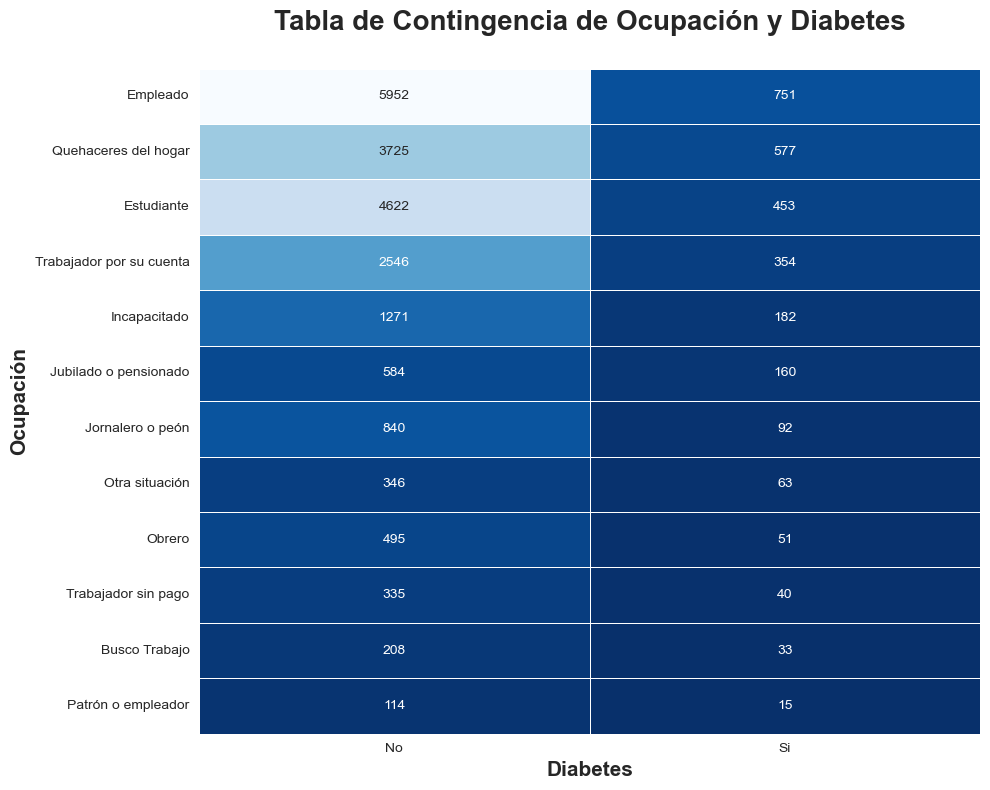

In [774]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_contingencia.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación y Diabetes\n', fontsize=20, fontweight='bold')
plt.xlabel('Diabetes', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-diabetes.svg')
plt.show()

In [775]:
# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
chi2, p, dof, expected

# p-value is less than 0.05, so we reject the null hypothesis
# there is a relationship between h0324 and a0301

# save it


(135.76085066031735,
 1.1836365464117955e-23,
 11,
 array([[5922.87429123,  780.12570877],
        [3801.3136209 ,  500.6863791 ],
        [4484.34835566,  590.65164434],
        [2562.48477467,  337.51522533],
        [1283.89323365,  169.10676635],
        [ 657.40988702,   86.59011298],
        [ 823.52958965,  108.47041035],
        [ 361.39871477,   47.60128523],
        [ 482.45402999,   63.54597001],
        [ 331.35578983,   43.64421017],
        [ 212.95132093,   28.04867907],
        [ 113.9863917 ,   15.0136083 ]]))

In [776]:
# Calcular la proporción de casos de diabetes en cada ocupación
diabetes_proportion = prueba_diabetes.groupby('Ocupacion')['Diabetes'].value_counts(normalize=True).unstack()

In [777]:
# Mostrar las proporciones
diabetes_proportion.sort_values('Si', ascending=False, inplace=True)
diabetes_proportion

Diabetes                        No        Si
Ocupacion                                   
Jubilado o pensionado     0.784946  0.215054
Otra situación            0.845966  0.154034
Busco Trabajo             0.863071  0.136929
Quehaceres del hogar      0.865876  0.134124
Incapacitado              0.874742  0.125258
Trabajador por su cuenta  0.877931  0.122069
Patrón o empleador        0.883721  0.116279
Empleado                  0.887961  0.112039
Trabajador sin pago       0.893333  0.106667
Jornalero o peón          0.901288  0.098712
Obrero                    0.906593  0.093407
Estudiante                0.910739  0.089261

# **Diabetes Gestasional**

In [779]:
prueba_diabetes = pd.concat([ocupacion['h0324'], prediabetes['a0301']], axis=1)
prueba_diabetes.rename(columns={'h0324': 'Ocupacion', 'a0301': 'Diabetes'}, inplace=True)

In [780]:
# change the names of the values of diabetes
prueba_diabetes['Diabetes'] = prueba_diabetes['Diabetes'].replace(1, 'Si')
prueba_diabetes['Diabetes'] = prueba_diabetes['Diabetes'].replace(2, 'Gestacional')
prueba_diabetes['Diabetes'] = prueba_diabetes['Diabetes'].replace(3, 'No')

prueba_diabetes = prueba_diabetes[prueba_diabetes['Diabetes'] != 'Si']

# contingency table
tabla_contingenciadg = pd.crosstab(prueba_diabetes['Ocupacion'], prueba_diabetes['Diabetes'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciadg)
print(chi2, p, dof, expected)

# sort the values
diabetes_proportiong = prueba_diabetes.groupby('Ocupacion')['Diabetes'].value_counts(normalize=True).unstack()
diabetes_proportiong.sort_values('Gestacional', ascending=False, inplace=True)

26.691752160117698 0.005114029176914302 11 [[8.86028020e-01 2.07113972e+02]
 [2.54392276e+01 5.94656077e+03]
 [1.97907989e+01 4.62620920e+03]
 [5.47803862e+00 1.28052196e+03]
 [3.58244983e+00 8.37417550e+02]
 [2.48769406e+00 5.81512306e+02]
 [2.11709580e+00 4.94882904e+02]
 [1.47387353e+00 3.44526126e+02]
 [4.85611511e-01 1.13514388e+02]
 [1.59272056e+01 3.72307279e+03]
 [1.09007005e+01 2.54809930e+03]
 [1.43127603e+00 3.34568724e+02]]


In [781]:
diabetes_proportiong

Diabetes                  Gestacional        No
Ocupacion                                      
Incapacitado                 0.011664  0.988336
Estudiante                   0.005166  0.994834
Trabajador por su cuenta     0.005080  0.994920
Obrero                       0.004024  0.995976
Quehaceres del hogar         0.003744  0.996256
Empleado                     0.003349  0.996651
Trabajador sin pago          0.002976  0.997024
Jornalero o peón             0.001189  0.998811
Busco Trabajo                     NaN  1.000000
Jubilado o pensionado             NaN  1.000000
Otra situación                    NaN  1.000000
Patrón o empleador                NaN  1.000000

# **HIPERTENSIÓN**

In [782]:
mergefull = pd.read_csv('mergefull.csv')

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\3513126468.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,40,41,42,44,45,46,48,49,50,51,52,56,57,58,130,186,946,955,956,957,1013,1193,1224) have mixed types. Specify dtype option on import or set low_memory=False.
  mergefull = pd.read_csv('mergefull.csv')


In [783]:
hipertension = mergefull['a0401']

In [784]:
hipertension.value_counts()

a0401
3    19252
1     4471
2      198
Name: count, dtype: int64

In [785]:
prueba_hipertension = pd.concat([ocupacion['h0324'], hipertension], axis=1)
prueba_hipertension.rename(columns={'h0324': 'Ocupacion', 'a0401': 'Hipertension'}, inplace=True)


In [786]:

# change the names of the values of diabetes
prueba_hipertension['Hipertension'] = prueba_hipertension['Hipertension'].replace(1, 'Si')
prueba_hipertension['Hipertension'] = prueba_hipertension['Hipertension'].replace(2, 'Durante embarazo')
prueba_hipertension['Hipertension'] = prueba_hipertension['Hipertension'].replace(3, 'No')

In [787]:
prueba_hipertension = prueba_hipertension[prueba_hipertension['Hipertension'] != 'Durante embarazo']

In [788]:
# contingency table
tabla_contingenciah = pd.crosstab(prueba_hipertension['Ocupacion'], prueba_hipertension['Hipertension'])
tabla_contingenciah

Hipertension                No    Si
Ocupacion                           
Busco Trabajo              185    55
Empleado                  5452  1226
Estudiante                4277   768
Incapacitado              1172   267
Jornalero o peón           786   141
Jubilado o pensionado      497   246
Obrero                     453    91
Otra situación             299   110
Patrón o empleador         102    27
Quehaceres del hogar      3384   897
Trabajador por su cuenta  2320   572
Trabajador sin pago        307    67

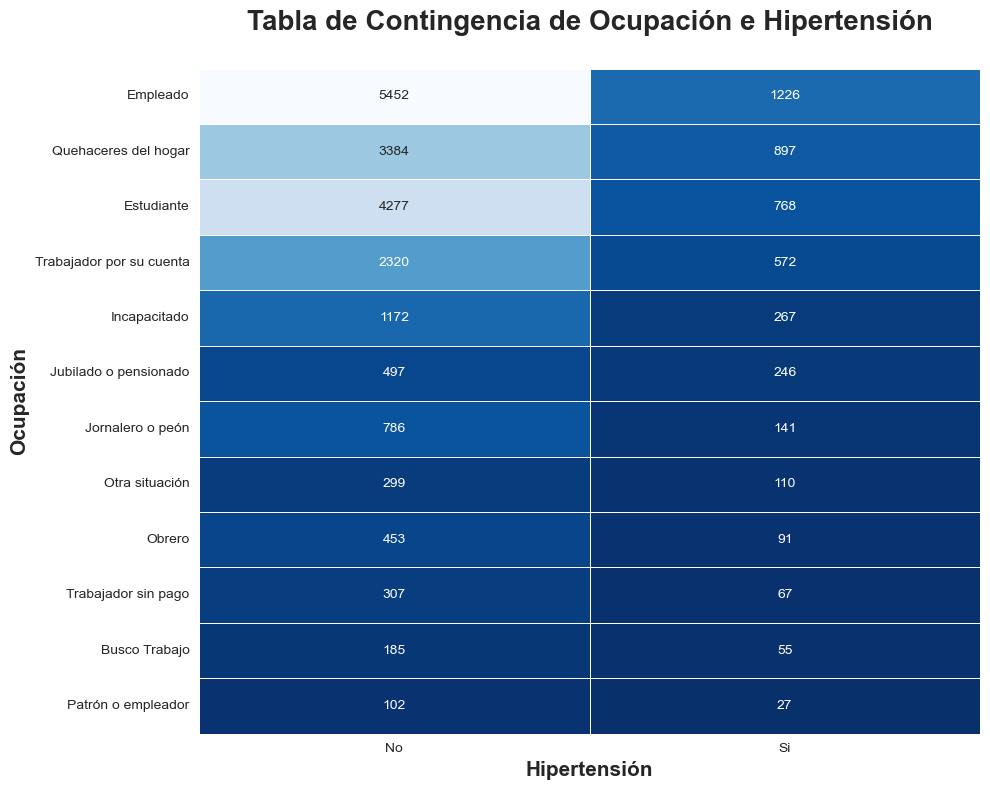

In [789]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_contingenciah.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciah, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación e Hipertensión\n', fontsize=20, fontweight='bold')
plt.xlabel('Hipertensión', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-hipertension.svg')
plt.show()

In [790]:
# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciah)
chi2, p, dof, expected

(187.41574905373332,
 3.0092327128630235e-34,
 11,
 array([[5419.37690393, 1258.62309607],
        [3474.14682925,  806.85317075],
        [4094.15341125,  950.84658875],
        [2346.93590988,  545.06409012],
        [1167.78726636,  271.21273364],
        [ 602.96451627,  140.03548373],
        [ 752.28547319,  174.71452681],
        [ 331.91451837,   77.08548163],
        [ 441.47065525,  102.52934475],
        [ 303.51107548,   70.48892452],
        [ 194.76646555,   45.23353445],
        [ 104.68697523,   24.31302477]]))

In [791]:
# Calcular la proporción de casos de diabetes en cada ocupación
hipertension_prop = prueba_hipertension.groupby('Ocupacion')['Hipertension'].value_counts(normalize=True).unstack()

In [792]:
# Mostrar las proporciones
hipertension_prop.sort_values('Si', ascending=False, inplace=True)
hipertension_prop

Hipertension                    No        Si
Ocupacion                                   
Jubilado o pensionado     0.668910  0.331090
Otra situación            0.731051  0.268949
Busco Trabajo             0.770833  0.229167
Quehaceres del hogar      0.790470  0.209530
Patrón o empleador        0.790698  0.209302
Trabajador por su cuenta  0.802213  0.197787
Incapacitado              0.814454  0.185546
Empleado                  0.816412  0.183588
Trabajador sin pago       0.820856  0.179144
Obrero                    0.832721  0.167279
Estudiante                0.847770  0.152230
Jornalero o peón          0.847896  0.152104

# **Infartos o ataques al corazon**

In [793]:
infarto = mergefull['a0502a']

In [794]:
infarto.value_counts()

a0502a
2    23425
1      496
Name: count, dtype: int64

In [795]:
prueba_infarto = pd.concat([ocupacion['h0324'], infarto], axis=1)
prueba_infarto.rename(columns={'h0324': 'Ocupacion', 'a0502a': 'Infarto'}, inplace=True)

# change the names of the values of diabetes
prueba_infarto['Infarto'] = prueba_infarto['Infarto'].replace(1, 'Si')
prueba_infarto['Infarto'] = prueba_infarto['Infarto'].replace(2, 'No')

# contingency table
tabla_contingenciainf = pd.crosstab(prueba_infarto['Ocupacion'], prueba_infarto['Infarto'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciainf)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
infarto_prop = prueba_infarto.groupby('Ocupacion')['Infarto'].value_counts(normalize=True).unstack()
infarto_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 22.38680632767108, p: 0.021542128496051176, dof: 11, expected: [[2.36018453e+02 4.98154735e+00]
 [6.58403343e+03 1.38966568e+02]
 [4.99360203e+03 1.05397966e+02]
 [1.43765597e+03 3.03440311e+01]
 [9.13714591e+02 1.92854094e+01]
 [7.28621281e+02 1.53787188e+01]
 [5.36672664e+02 1.13273359e+01]
 [4.00545839e+02 8.45416126e+00]
 [1.26333529e+02 2.66647140e+00]
 [4.22678689e+03 8.92131052e+01]
 [2.85278736e+03 6.02126449e+01]
 [3.68227959e+02 7.77204067e+00]]


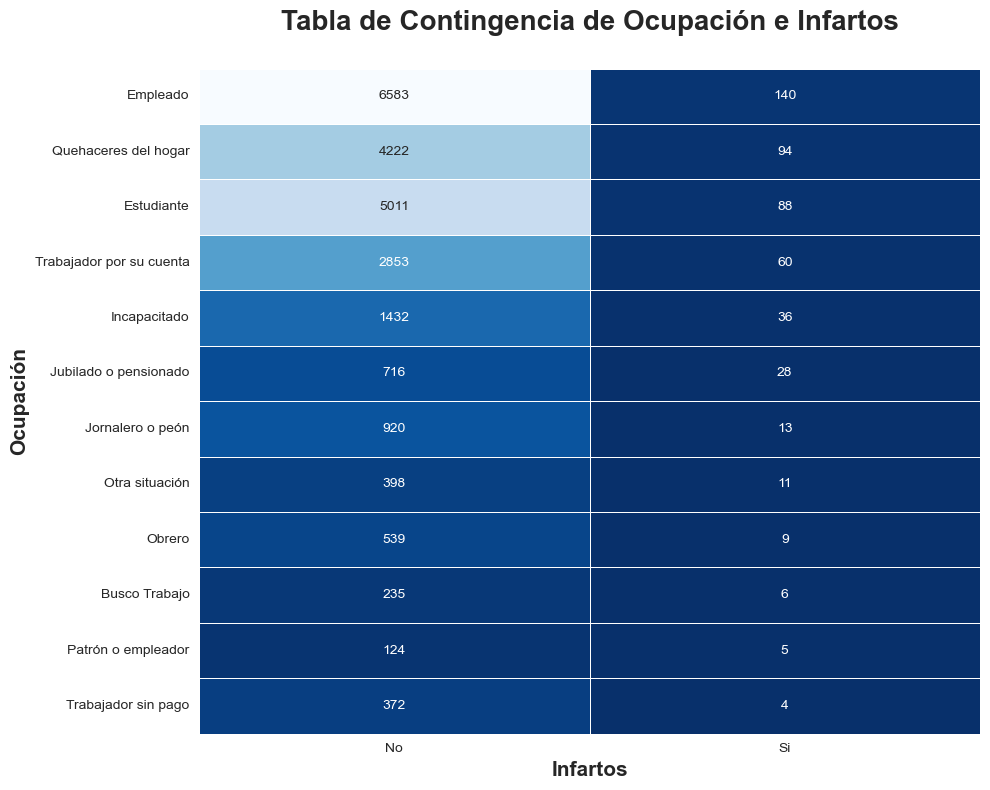

In [796]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_contingenciainf.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciainf, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación e Infartos\n', fontsize=20, fontweight='bold')
plt.xlabel('Infartos', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-infartos.svg')
plt.show()

In [797]:
infarto_prop

Infarto                         No        Si
Ocupacion                                   
Patrón o empleador        0.961240  0.038760
Jubilado o pensionado     0.962366  0.037634
Otra situación            0.973105  0.026895
Busco Trabajo             0.975104  0.024896
Incapacitado              0.975477  0.024523
Quehaceres del hogar      0.978221  0.021779
Empleado                  0.979176  0.020824
Trabajador por su cuenta  0.979403  0.020597
Estudiante                0.982742  0.017258
Obrero                    0.983577  0.016423
Jornalero o peón          0.986066  0.013934
Trabajador sin pago       0.989362  0.010638

# **Angina de pechoo**

In [798]:
angina = mergefull['a0502b']

angina.value_counts()

a0502b
2    23577
1      344
Name: count, dtype: int64

In [799]:
prueba_angina = pd.concat([ocupacion['h0324'], angina], axis=1)

prueba_angina.rename(columns={'h0324': 'Ocupacion', 'a0502b': 'Angina'}, inplace=True)

# change the names of the values of diabetes
prueba_angina['Angina'] = prueba_angina['Angina'].replace(1, 'Si')
prueba_angina['Angina'] = prueba_angina['Angina'].replace(2, 'No')

# contingency table
tabla_contingenciaang = pd.crosstab(prueba_angina['Ocupacion'], prueba_angina['Angina'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciaang)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
angina_prop = prueba_angina.groupby('Ocupacion')['Angina'].value_counts(normalize=True).unstack()
angina_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 23.79398137548107, p: 0.013630285341187378, dof: 11, expected: [[2.37541152e+02 3.45884765e+00]
 [6.62651107e+03 9.64889326e+01]
 [5.02581882e+03 7.31811791e+01]
 [1.44693117e+03 2.10688313e+01]
 [9.19609523e+02 1.33904766e+01]
 [7.33322064e+02 1.06779363e+01]
 [5.40135068e+02 7.86493159e+00]
 [4.03130005e+02 5.86999456e+00]
 [1.27148584e+02 1.85141638e+00]
 [4.25405649e+03 6.19435123e+01]
 [2.87119243e+03 4.18075652e+01]
 [3.70603624e+02 5.39637642e+00]]


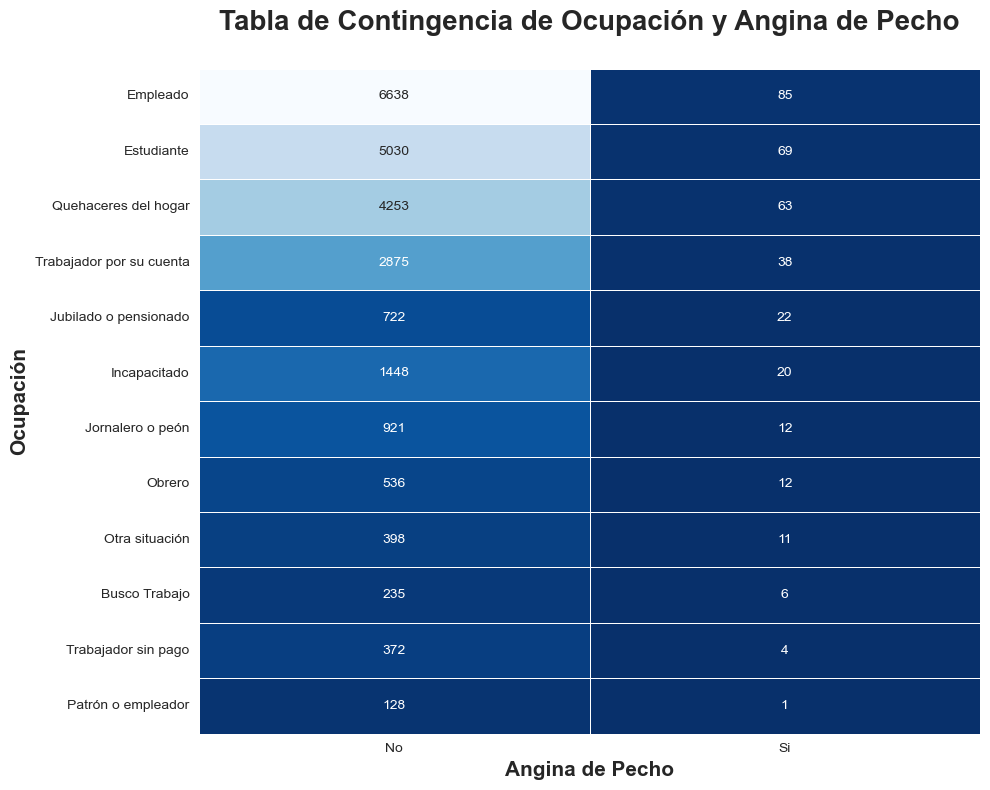

In [800]:
tabla_contingenciaang.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciaang, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación y Angina de Pecho\n', fontsize=20, fontweight='bold')
plt.xlabel('Angina de Pecho', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-angina.svg')
plt.show()

In [801]:
angina_prop

Angina                          No        Si
Ocupacion                                   
Jubilado o pensionado     0.970430  0.029570
Otra situación            0.973105  0.026895
Busco Trabajo             0.975104  0.024896
Obrero                    0.978102  0.021898
Quehaceres del hogar      0.985403  0.014597
Incapacitado              0.986376  0.013624
Estudiante                0.986468  0.013532
Trabajador por su cuenta  0.986955  0.013045
Jornalero o peón          0.987138  0.012862
Empleado                  0.987357  0.012643
Trabajador sin pago       0.989362  0.010638
Patrón o empleador        0.992248  0.007752

# **Insuficiencia Cardiaca**

In [802]:
insuficiencia_cardiaca = mergefull['a0502c']

insuficiencia_cardiaca.value_counts()

a0502c
2    23491
1      430
Name: count, dtype: int64

In [803]:
prueba_insuficiencia = pd.concat([ocupacion['h0324'], insuficiencia_cardiaca], axis=1)

prueba_insuficiencia.rename(columns={'h0324': 'Ocupacion', 'a0502c': 'Insuficiencia Cardiaca'}, inplace=True)

# change the names of the values of diabetes
prueba_insuficiencia['Insuficiencia Cardiaca'] = prueba_insuficiencia['Insuficiencia Cardiaca'].replace(1, 'Si')
prueba_insuficiencia['Insuficiencia Cardiaca'] = prueba_insuficiencia['Insuficiencia Cardiaca'].replace(2, 'No')

# contingency table
tabla_contingenciains = pd.crosstab(prueba_insuficiencia['Ocupacion'], prueba_insuficiencia['Insuficiencia Cardiaca'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciains)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
insuficiencia_prop = prueba_insuficiencia.groupby('Ocupacion')['Insuficiencia Cardiaca'].value_counts(normalize=True).unstack()
insuficiencia_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 18.360635840741352, p: 0.07358105820029069, dof: 11, expected: [[2.36673919e+02 4.32608059e+00]
 [6.60231851e+03 1.20681493e+02]
 [5.00747019e+03 9.15298130e+01]
 [1.44164860e+03 2.63513955e+01]
 [9.16252144e+02 1.67478556e+01]
 [7.30644797e+02 1.33552031e+01]
 [5.38163103e+02 9.83689694e+00]
 [4.01658228e+02 7.34177162e+00]
 [1.26684380e+02 2.31561990e+00]
 [4.23852546e+03 7.74745387e+01]
 [2.86071007e+03 5.22899284e+01]
 [3.69250596e+02 6.74940374e+00]]


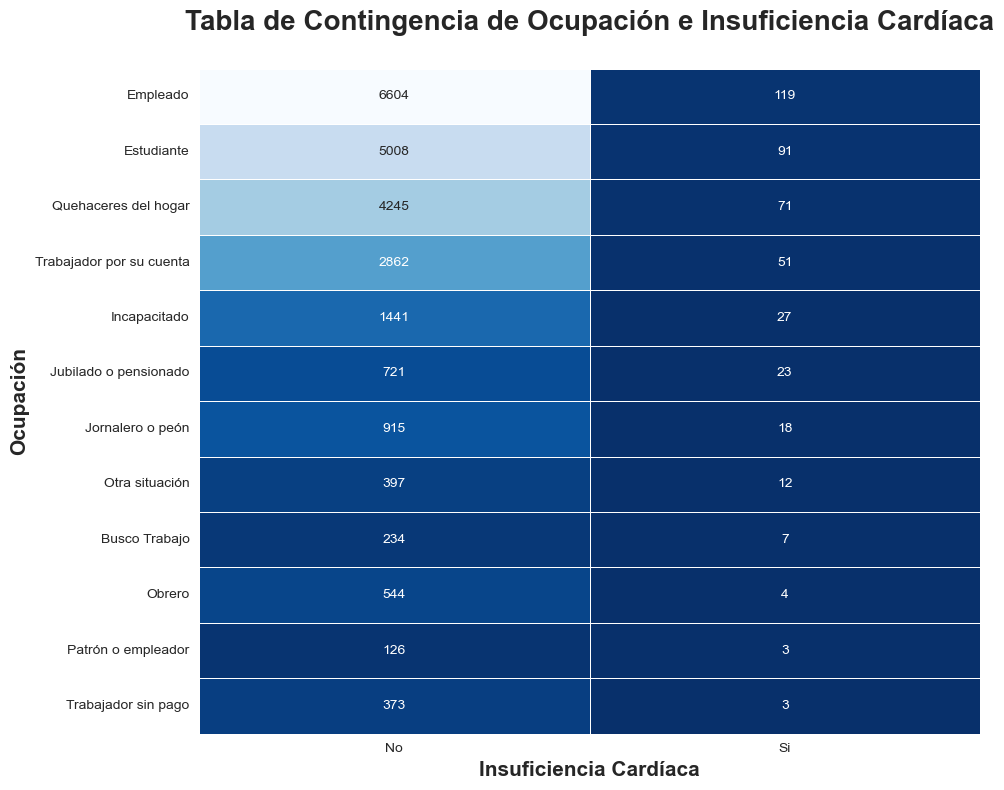

In [804]:
tabla_contingenciains.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciains, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación e Insuficiencia Cardíaca\n', fontsize=20, fontweight='bold')
plt.xlabel('Insuficiencia Cardíaca', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-cardiaca.svg')
plt.show()

In [805]:
insuficiencia_prop

Insuficiencia Cardiaca          No        Si
Ocupacion                                   
Jubilado o pensionado     0.969086  0.030914
Otra situación            0.970660  0.029340
Busco Trabajo             0.970954  0.029046
Patrón o empleador        0.976744  0.023256
Jornalero o peón          0.980707  0.019293
Incapacitado              0.981608  0.018392
Estudiante                0.982153  0.017847
Empleado                  0.982300  0.017700
Trabajador por su cuenta  0.982492  0.017508
Quehaceres del hogar      0.983550  0.016450
Trabajador sin pago       0.992021  0.007979
Obrero                    0.992701  0.007299

# **Embolia**

In [806]:
embolia = mergefull['a0502d']

embolia.value_counts()

a0502d
2    23697
1      224
Name: count, dtype: int64

In [807]:
prueba_embolia = pd.concat([ocupacion['h0324'], embolia], axis=1)

prueba_embolia.rename(columns={'h0324': 'Ocupacion', 'a0502d': 'Embolia'}, inplace=True)

# change the names of the values of diabetes
prueba_embolia['Embolia'] = prueba_embolia['Embolia'].replace(1, 'Si')
prueba_embolia['Embolia'] = prueba_embolia['Embolia'].replace(2, 'No')

# contingency table
tabla_contingenciaemb = pd.crosstab(prueba_embolia['Ocupacion'], prueba_embolia['Embolia'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciaemb)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
embolia_prop = prueba_embolia.groupby('Ocupacion')['Embolia'].value_counts(normalize=True).unstack()
embolia_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 27.329705734150703, p: 0.004096262493013745, dof: 11, expected: [[2.38741161e+02 2.25883928e+00]
 [6.65998682e+03 6.30131805e+01]
 [5.05120821e+03 4.77917905e+01]
 [1.45424076e+03 1.37592368e+01]
 [9.24255199e+02 8.74480104e+00]
 [7.37026654e+02 6.97334617e+00]
 [5.42863718e+02 5.13628185e+00]
 [4.05166534e+02 3.83346584e+00]
 [1.27790912e+02 1.20908825e+00]
 [4.27554709e+03 4.04529060e+01]
 [2.88569710e+03 2.73028997e+01]
 [3.72475836e+02 3.52416419e+00]]


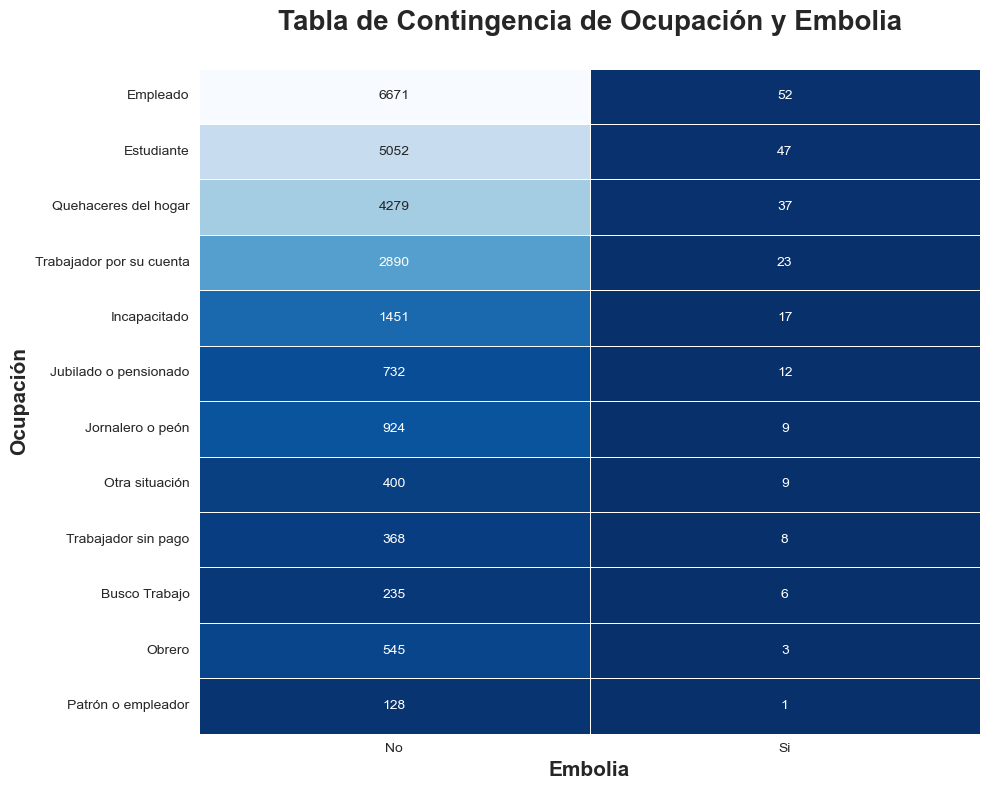

In [808]:
tabla_contingenciaemb.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciaemb, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación y Embolia\n', fontsize=20, fontweight='bold')
plt.xlabel('Embolia', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-embolia.svg')
plt.show()

In [809]:
# plot the table of contingency
tabla_contingenciaemb

Embolia                     No  Si
Ocupacion                         
Empleado                  6671  52
Estudiante                5052  47
Quehaceres del hogar      4279  37
Trabajador por su cuenta  2890  23
Incapacitado              1451  17
Jubilado o pensionado      732  12
Jornalero o peón           924   9
Otra situación             400   9
Trabajador sin pago        368   8
Busco Trabajo              235   6
Obrero                     545   3
Patrón o empleador         128   1

In [810]:
embolia_prop

Embolia                         No        Si
Ocupacion                                   
Busco Trabajo             0.975104  0.024896
Otra situación            0.977995  0.022005
Trabajador sin pago       0.978723  0.021277
Jubilado o pensionado     0.983871  0.016129
Incapacitado              0.988420  0.011580
Jornalero o peón          0.990354  0.009646
Estudiante                0.990783  0.009217
Quehaceres del hogar      0.991427  0.008573
Trabajador por su cuenta  0.992104  0.007896
Patrón o empleador        0.992248  0.007752
Empleado                  0.992265  0.007735
Obrero                    0.994526  0.005474

# **Infección en vías urinarias más de una ocación**

In [811]:
infeccion = mergefull['a0601a']

infeccion.value_counts()

a0601a
2    18727
1     5194
Name: count, dtype: int64

In [812]:
prueba_infeccion = pd.concat([ocupacion['h0324'], infeccion], axis=1)

prueba_infeccion.rename(columns={'h0324': 'Ocupacion', 'a0601a': 'Infeccion'}, inplace=True)

# change the names of the values of diabetes
prueba_infeccion['Infeccion'] = prueba_infeccion['Infeccion'].replace(1, 'Si')
prueba_infeccion['Infeccion'] = prueba_infeccion['Infeccion'].replace(2, 'No')

# contingency table
tabla_contingenciainf = pd.crosstab(prueba_infeccion['Ocupacion'], prueba_infeccion['Infeccion'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciainf)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
infeccion_prop = prueba_infeccion.groupby('Ocupacion')['Infeccion'].value_counts(normalize=True).unstack()
infeccion_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 23.08562870129422, p: 0.017190025920209438, dof: 11, expected: [[ 188.64333236   52.35666764]
 [5262.44449559 1460.55550441]
 [3991.25457132 1107.74542868]
 [1149.0805473   318.9194527 ]
 [ 730.30800452  202.69199548]
 [ 582.36779782  161.63220218]
 [ 428.9483242   119.0516758 ]
 [ 320.14573832   88.85426168]
 [ 100.97506172   28.02493828]
 [3378.35942926  937.64057074]
 [2280.15778903  632.84221097]
 [ 294.31490857   81.68509143]]


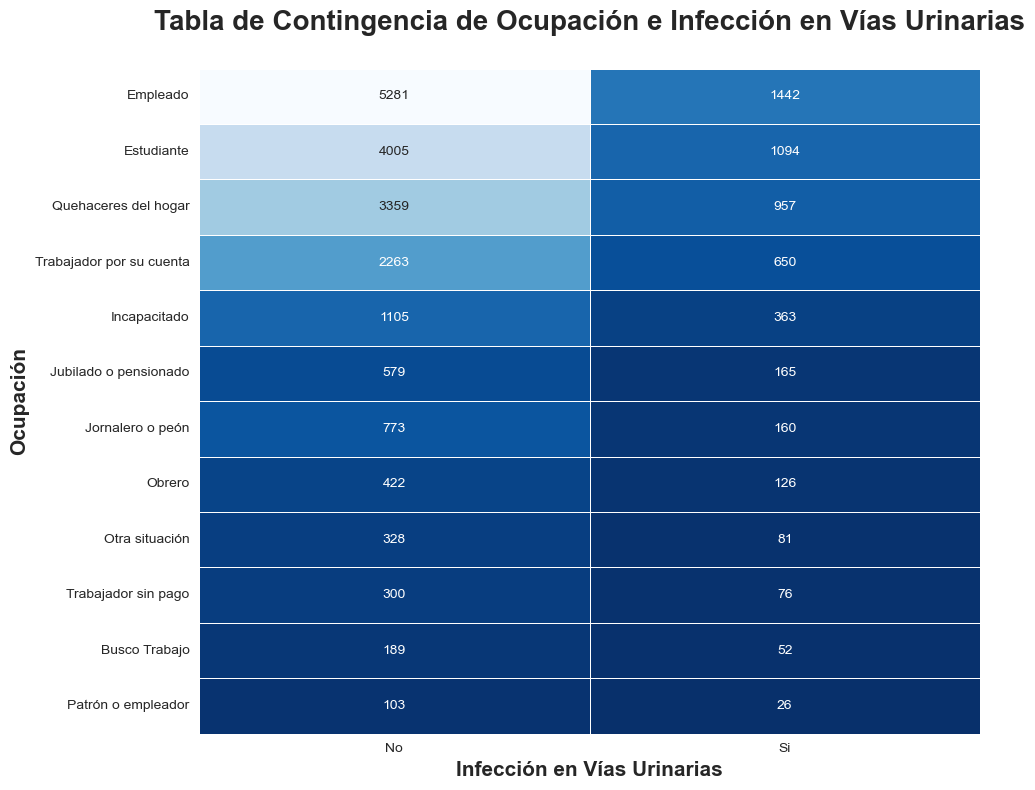

In [813]:
tabla_contingenciainf.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciainf, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación e Infección en Vías Urinarias\n', fontsize=20, fontweight='bold')
plt.xlabel('Infección en Vías Urinarias', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-vias.svg')
plt.show()

In [814]:
infeccion_prop

Infeccion                       No        Si
Ocupacion                                   
Incapacitado              0.752725  0.247275
Obrero                    0.770073  0.229927
Trabajador por su cuenta  0.776862  0.223138
Jubilado o pensionado     0.778226  0.221774
Quehaceres del hogar      0.778267  0.221733
Busco Trabajo             0.784232  0.215768
Estudiante                0.785448  0.214552
Empleado                  0.785512  0.214488
Trabajador sin pago       0.797872  0.202128
Patrón o empleador        0.798450  0.201550
Otra situación            0.801956  0.198044
Jornalero o peón          0.828510  0.171490

# **Calculos renalos**

In [815]:
calculos_renales = mergefull['a0601b']

calculos_renales.value_counts()

a0601b
2    23021
1      900
Name: count, dtype: int64

In [816]:
prueba_calculos = pd.concat([ocupacion['h0324'], calculos_renales], axis=1)

prueba_calculos.rename(columns={'h0324': 'Ocupacion', 'a0601b': 'Calculos Renales'}, inplace=True)

# change the names of the values of diabetes
prueba_calculos['Calculos Renales'] = prueba_calculos['Calculos Renales'].replace(1, 'Si')
prueba_calculos['Calculos Renales'] = prueba_calculos['Calculos Renales'].replace(2, 'No')

# contingency table
tabla_contingenciacal = pd.crosstab(prueba_calculos['Ocupacion'], prueba_calculos['Calculos Renales'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciacal)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
calculos_prop = prueba_calculos.groupby('Ocupacion')['Calculos Renales'].value_counts(normalize=True).unstack()
calculos_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 18.3206193231807, p: 0.07443311045263071, dof: 11, expected: [[2.31934391e+02 9.06560944e+00]
 [6.47010335e+03 2.52896648e+02]
 [4.90719277e+03 1.91807230e+02]
 [1.41277878e+03 5.52212226e+01]
 [8.97903678e+02 3.50963220e+01]
 [7.16013222e+02 2.79867777e+01]
 [5.27386083e+02 2.06139169e+01]
 [3.93614796e+02 1.53852044e+01]
 [1.24147454e+02 4.85254613e+00]
 [4.15364660e+03 1.62353404e+02]
 [2.80342274e+03 1.09577263e+02]
 [3.61856145e+02 1.41438554e+01]]


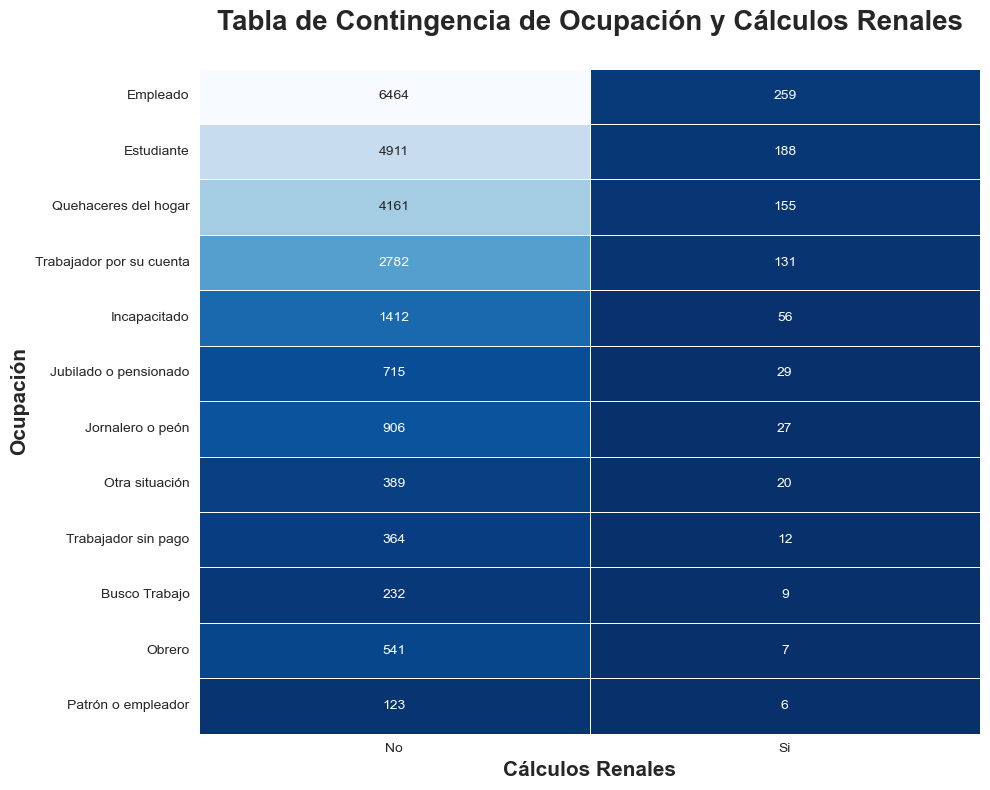

In [817]:
tabla_contingenciacal.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciacal, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación y Cálculos Renales\n', fontsize=20, fontweight='bold')
plt.xlabel('Cálculos Renales', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-calrena.svg')
plt.show()

In [818]:
calculos_prop

Calculos Renales                No        Si
Ocupacion                                   
Otra situación            0.951100  0.048900
Patrón o empleador        0.953488  0.046512
Trabajador por su cuenta  0.955029  0.044971
Jubilado o pensionado     0.961022  0.038978
Empleado                  0.961476  0.038524
Incapacitado              0.961853  0.038147
Busco Trabajo             0.962656  0.037344
Estudiante                0.963130  0.036870
Quehaceres del hogar      0.964087  0.035913
Trabajador sin pago       0.968085  0.031915
Jornalero o peón          0.971061  0.028939
Obrero                    0.987226  0.012774

# **Insuficiencia Renal**

In [819]:
renal = mergefull['a0601c']

renal.value_counts()

a0601c
2    23625
1      296
Name: count, dtype: int64

In [820]:
prueba_renal = pd.concat([ocupacion['h0324'], renal], axis=1)

prueba_renal.rename(columns={'h0324': 'Ocupacion', 'a0601c': 'Enfermedad Renal'}, inplace=True)

# change the names of the values of diabetes
prueba_renal['Enfermedad Renal'] = prueba_renal['Enfermedad Renal'].replace(1, 'Si')
prueba_renal['Enfermedad Renal'] = prueba_renal['Enfermedad Renal'].replace(2, 'No')

# contingency table
tabla_contingenciaren = pd.crosstab(prueba_renal['Ocupacion'], prueba_renal['Enfermedad Renal'])

# chi2 test
chi2, p, dof, expected = chi2_contingency(tabla_contingenciaren)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, expected: {expected}')

# proporciones
renal_prop = prueba_renal.groupby('Ocupacion')['Enfermedad Renal'].value_counts(normalize=True).unstack()
renal_prop.sort_values('Si', ascending=False, inplace=True)

chi2: 42.62214226689629, p: 1.2634710136023644e-05, dof: 11, expected: [[2.38035273e+02 2.96472656e+00]
 [6.64029520e+03 8.27047994e+01]
 [5.03627328e+03 6.27267250e+01]
 [1.44994100e+03 1.80589983e+01]
 [9.21522449e+02 1.14775514e+01]
 [7.34847483e+02 9.15251684e+00]
 [5.41258630e+02 6.74136993e+00]
 [4.03968576e+02 5.03142391e+00]
 [1.27413072e+02 1.58692832e+00]
 [4.26290556e+03 5.30944391e+01]
 [2.87716494e+03 3.58350559e+01]
 [3.71374534e+02 4.62546550e+00]]


In [821]:
prueba_renal

Ocupacion Enfermedad Renal
0                  Empleado               No
1      Quehaceres del hogar               No
2                Estudiante               No
3                  Empleado               No
4                Estudiante               No
...                     ...              ...
16610                   NaN               No
16615                   NaN               No
19565                   NaN               No
21048                   NaN               No
23396                   NaN               No

[23921 rows x 2 columns]

In [822]:
ocupacion['h0324']

0                    Empleado
1        Quehaceres del hogar
2                  Estudiante
3                    Empleado
4                  Estudiante
                 ...         
23916              Estudiante
23917              Estudiante
23918                Empleado
23919              Estudiante
23920                Empleado
Name: h0324, Length: 23899, dtype: object

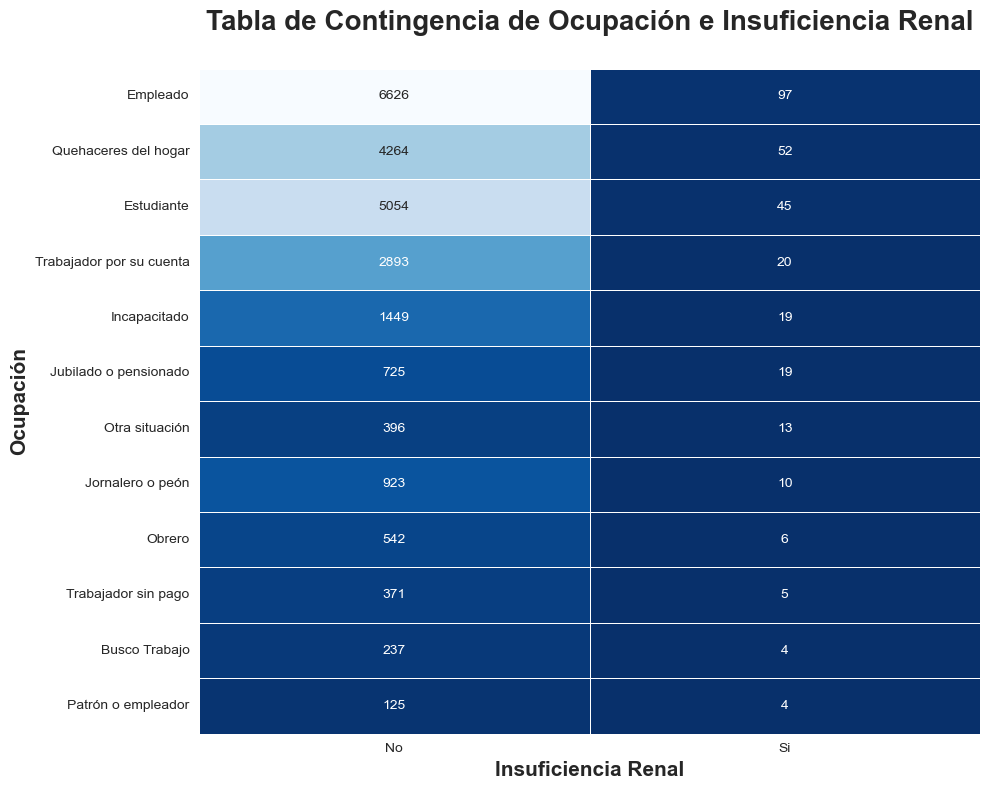

In [823]:
tabla_contingenciaren.sort_values('Si', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla_contingenciaren, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación e Insuficiencia Renal\n', fontsize=20, fontweight='bold')
plt.xlabel('Insuficiencia Renal', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-insuf-renal.svg')
plt.show()

In [824]:
renal_prop

Enfermedad Renal                No        Si
Ocupacion                                   
Otra situación            0.968215  0.031785
Patrón o empleador        0.968992  0.031008
Jubilado o pensionado     0.974462  0.025538
Busco Trabajo             0.983402  0.016598
Empleado                  0.985572  0.014428
Trabajador sin pago       0.986702  0.013298
Incapacitado              0.987057  0.012943
Quehaceres del hogar      0.987952  0.012048
Obrero                    0.989051  0.010949
Jornalero o peón          0.989282  0.010718
Estudiante                0.991175  0.008825
Trabajador por su cuenta  0.993134  0.006866

# **ALL**

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\3522888502.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2', alpha=0.8)


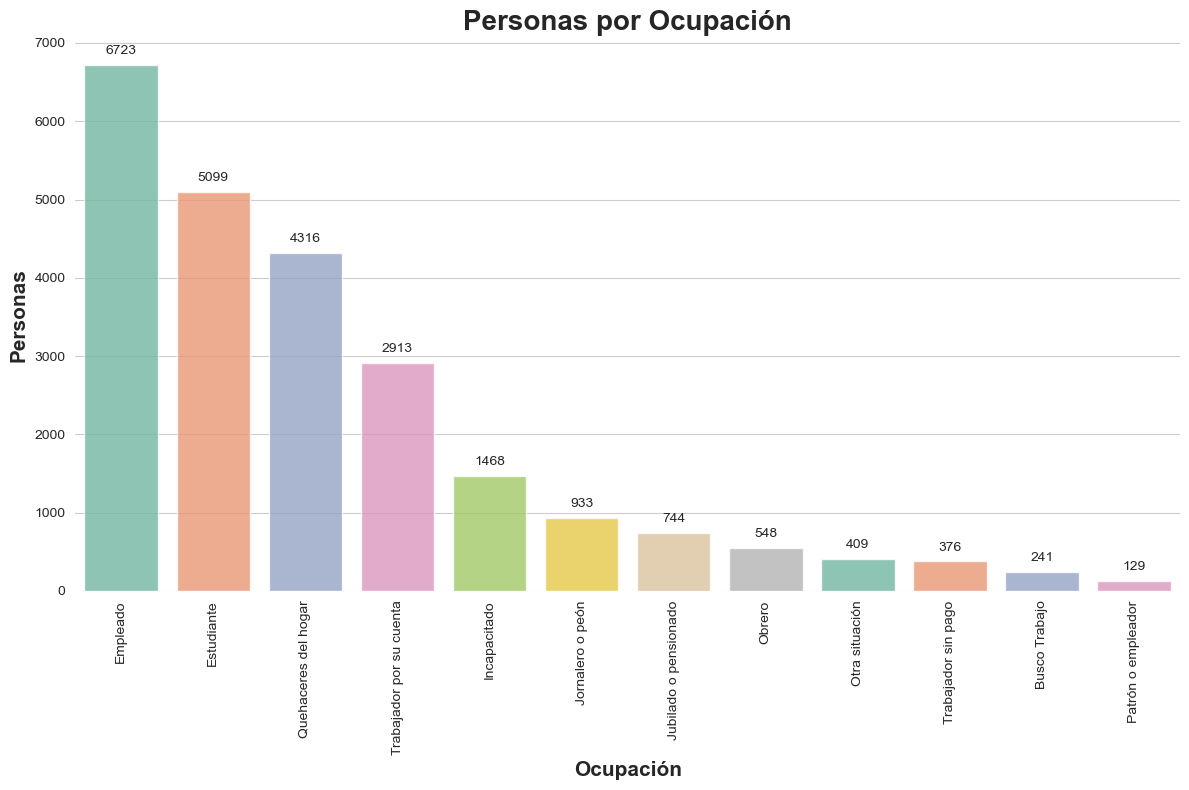

In [871]:
import seaborn as sns

import matplotlib.pyplot as plt

# Get the value counts
value_counts = ocupacion['h0324'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2', alpha=0.8)

# Add the numbers above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Set labels and title
plt.xlabel('Ocupación', fontsize=15, fontweight='bold')
plt.ylabel('Personas', fontsize=15, fontweight='bold')
plt.title('Personas por Ocupación', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)

# borrar el cuadro de afuera
plt.box(False)


plt.tight_layout()
plt.savefig('ocupacion-personas.svg')

# Show the plot
plt.show()

In [873]:
!pip install plotly

^C


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 4.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/14.8 MB 4.4 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/14.8 MB 4.5 MB/s eta 0:00:03
   --------- ------------------------------ 3.4/14.8 MB 4.5 MB/s eta 0:00:03
   ------------ --------------------------- 4.7/14.8 MB 4.8 MB/s eta 0:00:03
   ---------------- ----------------------- 6.0/14.8 MB 5.1 MB/s eta 0:00:02
   ------------------- -------------------- 7.1/14.8 MB 5.1 MB/s eta 0:00:02
   ----------------------- ---------------- 8.7/14.8 MB 5.4 MB/s eta 0:00:02
   ---------------------------- ----------- 10.5/14.8 MB 5.8 MB/s eta 0:00:01
   -------------------------------- ------- 12.1/14.8 MB 6.0 MB/s eta 0:00:01
   ---------------------------------- ----- 12.8/14.8 MB 5.8 MB/s eta 0:00:01
   -------------------------------------- - 14.4/14.8 MB 6.0 MB/s eta 0:00:01
  

In [825]:
todas = pd.concat([ocupacion['h0324'], ocupacion['h0303'], prediabetes['a0301'], mergefull['a0401'], mergefull['a0502a'], mergefull['a0502b'], mergefull['a0502c'], mergefull['a0502d'], mergefull['a0601a'], mergefull['a0601b'], mergefull['a0601c']], axis=1)

todas.rename(columns={'h0324': 'Ocupacion', 'h0303': 'Edad', 'a0301': 'Diabetes', 'a0401': 'Hipertensión', 'a0502a': 'Infarto', 'a0502b': 'Angina de Pecho', 'a0502c': 'Insuficiencia Cardiaca', 'a0502d': 'Embolia', 'a0601a': 'Infección en Vías Urinarias', 'a0601b': 'Cálculos Renales', 'a0601c': 'Insuficiencia Renal'}, inplace=True)


# Convertir la columna 'Edad' a valores numéricos, forzando errores a NaN
todas['Edad'] = pd.to_numeric(todas['Edad'], errors='coerce')

# 1 is Si and 2 is No except for edad
# drop the 3
todas = todas[todas['Diabetes'] != 3]

# drop the nan
todas = todas.dropna()

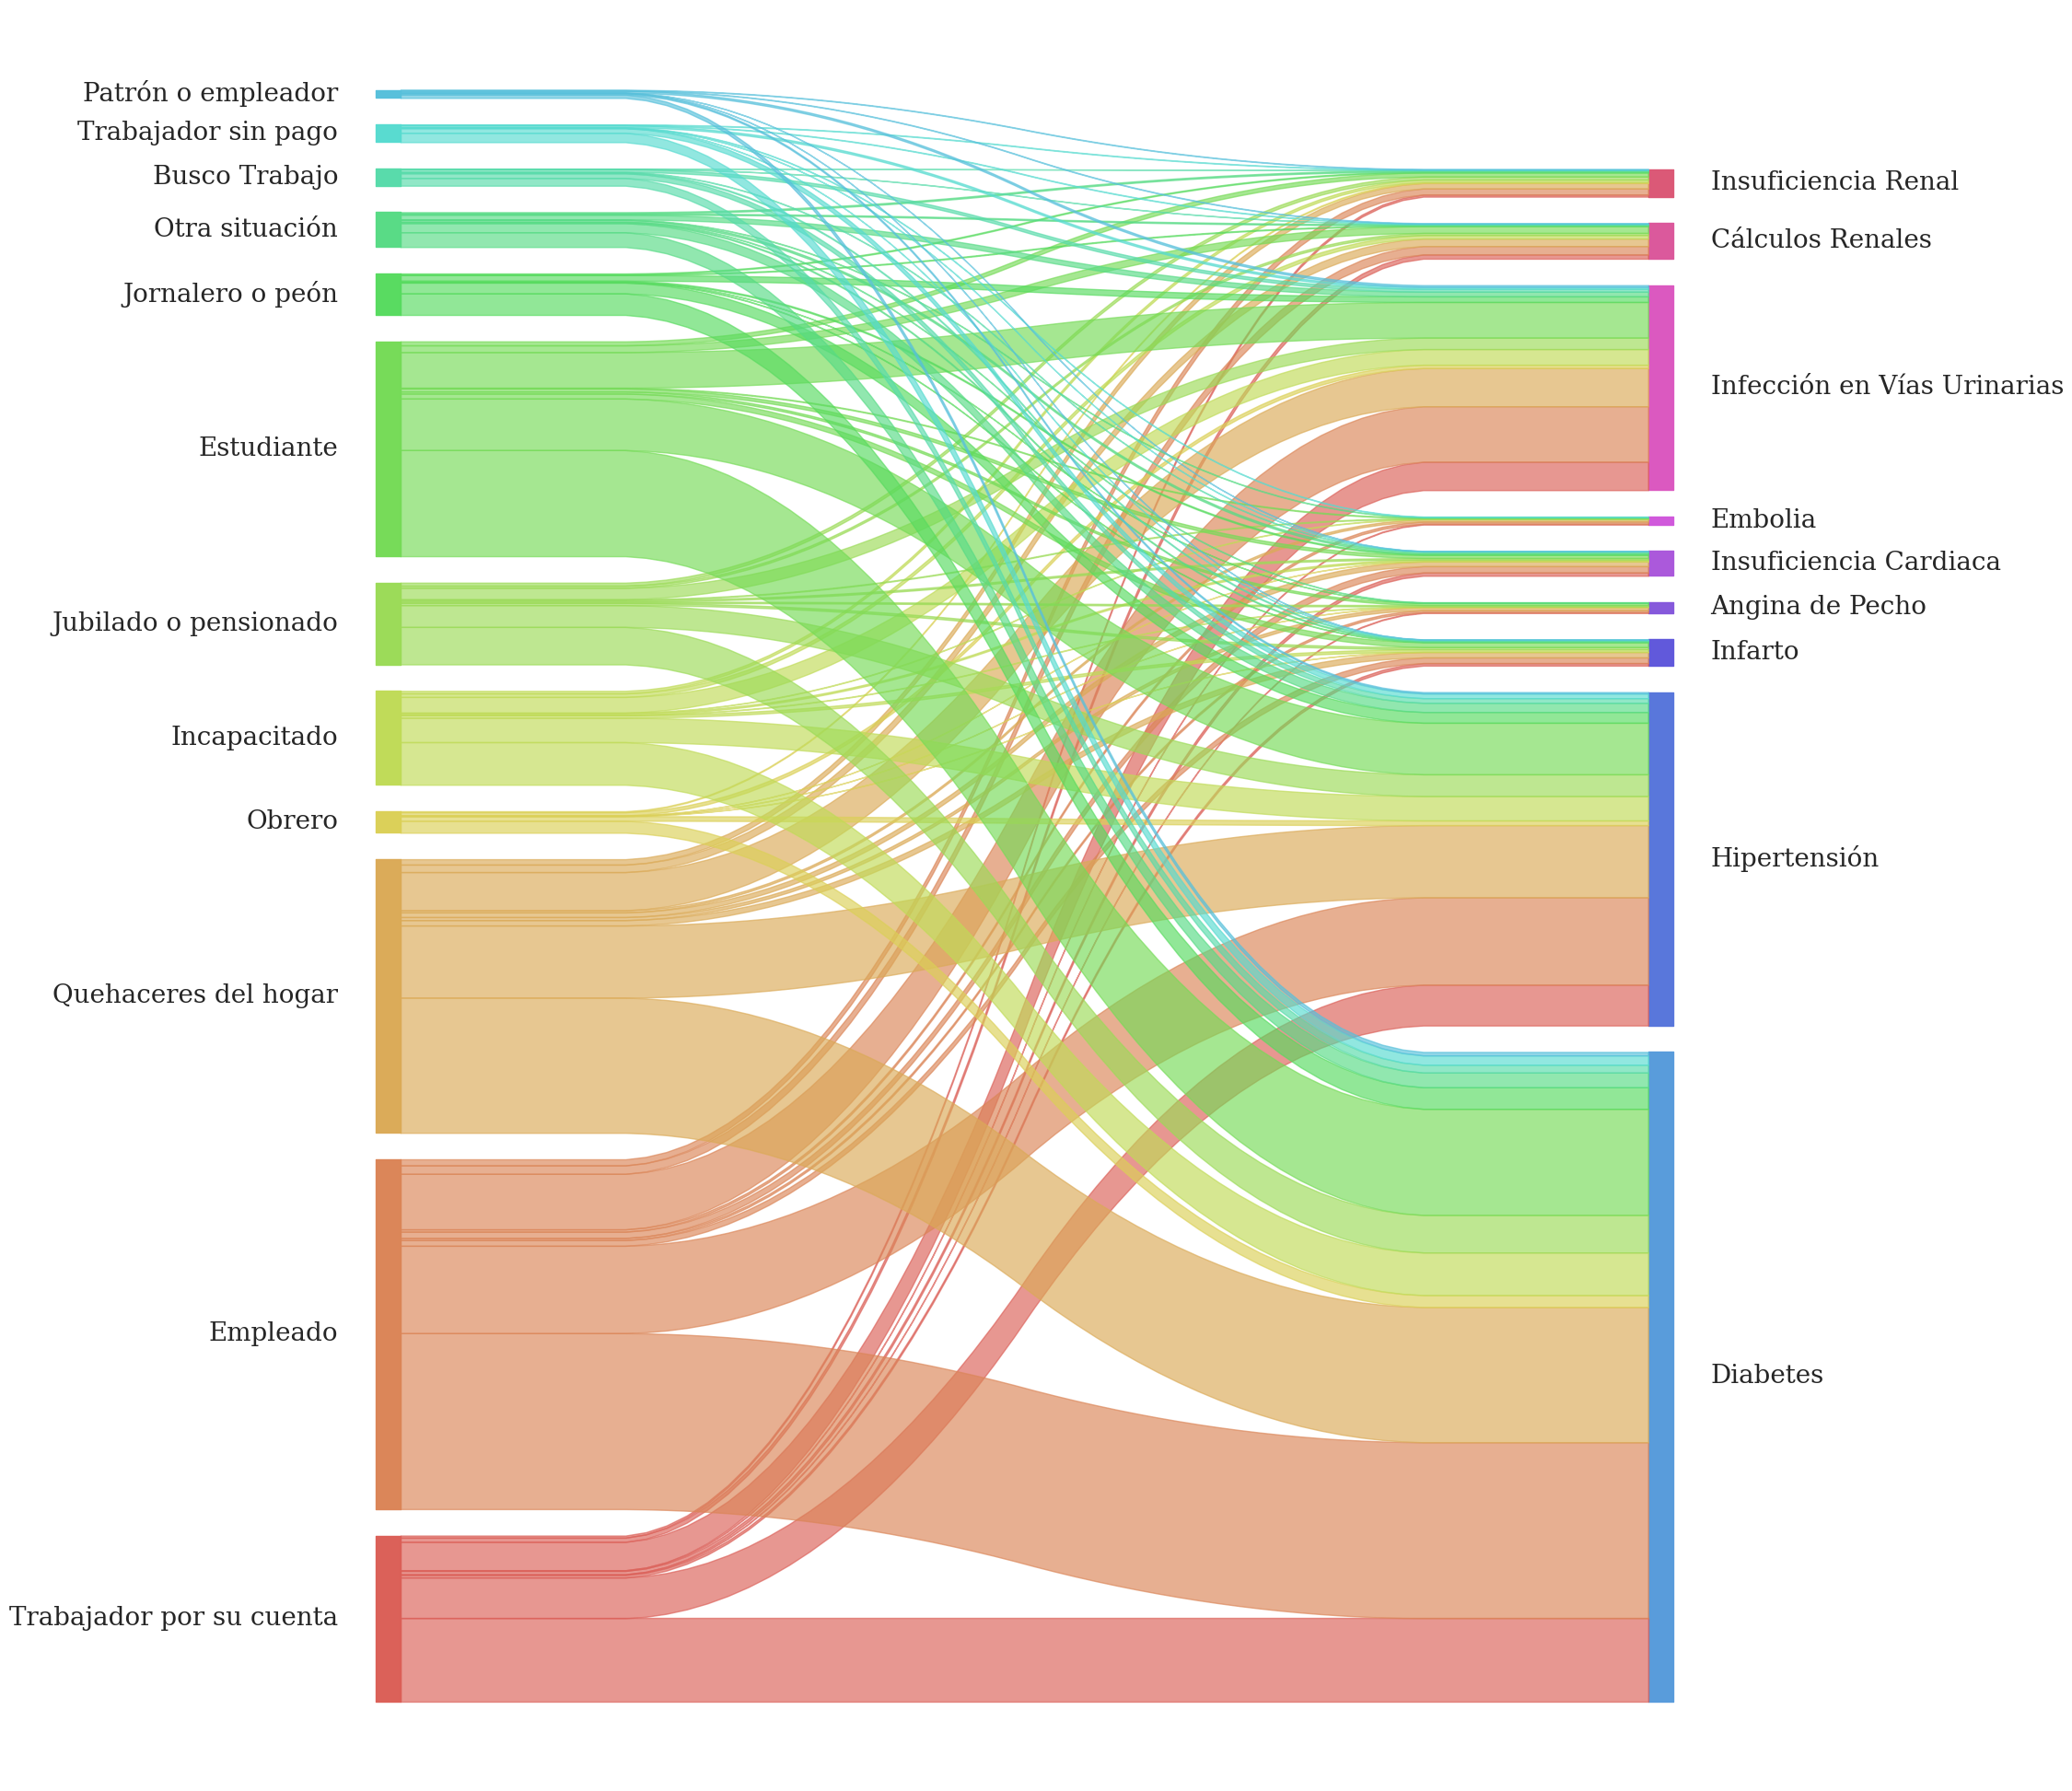

In [902]:
from pySankey.sankey import sankey

# Prepare the data for the Sankey diagram
labels = list(todas['Ocupacion'].unique()) + ['Diabetes', 'Hipertensión', 'Infarto', 'Angina de Pecho', 'Insuficiencia Cardiaca', 'Embolia', 'Infección en Vías Urinarias', 'Cálculos Renales', 'Insuficiencia Renal']
source = []
target = []
value = []

# Create the source, target, and value lists
for i, ocupacion in enumerate(todas['Ocupacion'].unique()):
    for j, disease in enumerate(['Diabetes', 'Hipertensión', 'Infarto', 'Angina de Pecho', 'Insuficiencia Cardiaca', 'Embolia', 'Infección en Vías Urinarias', 'Cálculos Renales', 'Insuficiencia Renal']):
        count = todas[(todas['Ocupacion'] == ocupacion) & (todas[disease] == 1)].shape[0]
        if count > 0:
            source.append(labels[i])
            target.append(disease)
            value.append(count)

# Create the Sankey diagram
sankey(source, target, value, aspect=20, fontsize=20)

fig = plt.gcf()

fig.set_size_inches(20, 25)

fig.set_facecolor('w')

plt.savefig('sankey-diagram.svg')

plt.show()


In [905]:
import plotly.graph_objects as go

# Prepare the data for the Sankey diagram
labels = list(todas['Ocupacion'].unique()) + ['Diabetes', 'Hipertensión', 'Infarto', 'Angina de Pecho', 'Insuficiencia Cardiaca', 'Embolia', 'Infección en Vías Urinarias', 'Cálculos Renales', 'Insuficiencia Renal']
source = []
target = []
value = []

# Create the source, target, and value lists
for i, ocupacion in enumerate(todas['Ocupacion'].unique()):
    for j, disease in enumerate(['Diabetes', 'Hipertensión', 'Infarto', 'Angina de Pecho', 'Insuficiencia Cardiaca', 'Embolia', 'Infección en Vías Urinarias', 'Cálculos Renales', 'Insuficiencia Renal']):
        count = todas[(todas['Ocupacion'] == ocupacion) & (todas[disease] == 1)].shape[0]
        if count > 0:
            source.append(i)
            target.append(len(todas['Ocupacion'].unique()) + j)
            value.append(count)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram of Ocupacion and Diseases", font_size=10, height=800)
fig.write_html('sankey-diagramue.html')
fig.show()

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\3414542015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=todas, x='Ocupacion', y='Edad', palette="hls", cut=0.1, alpha=0.7, linewidth=1)


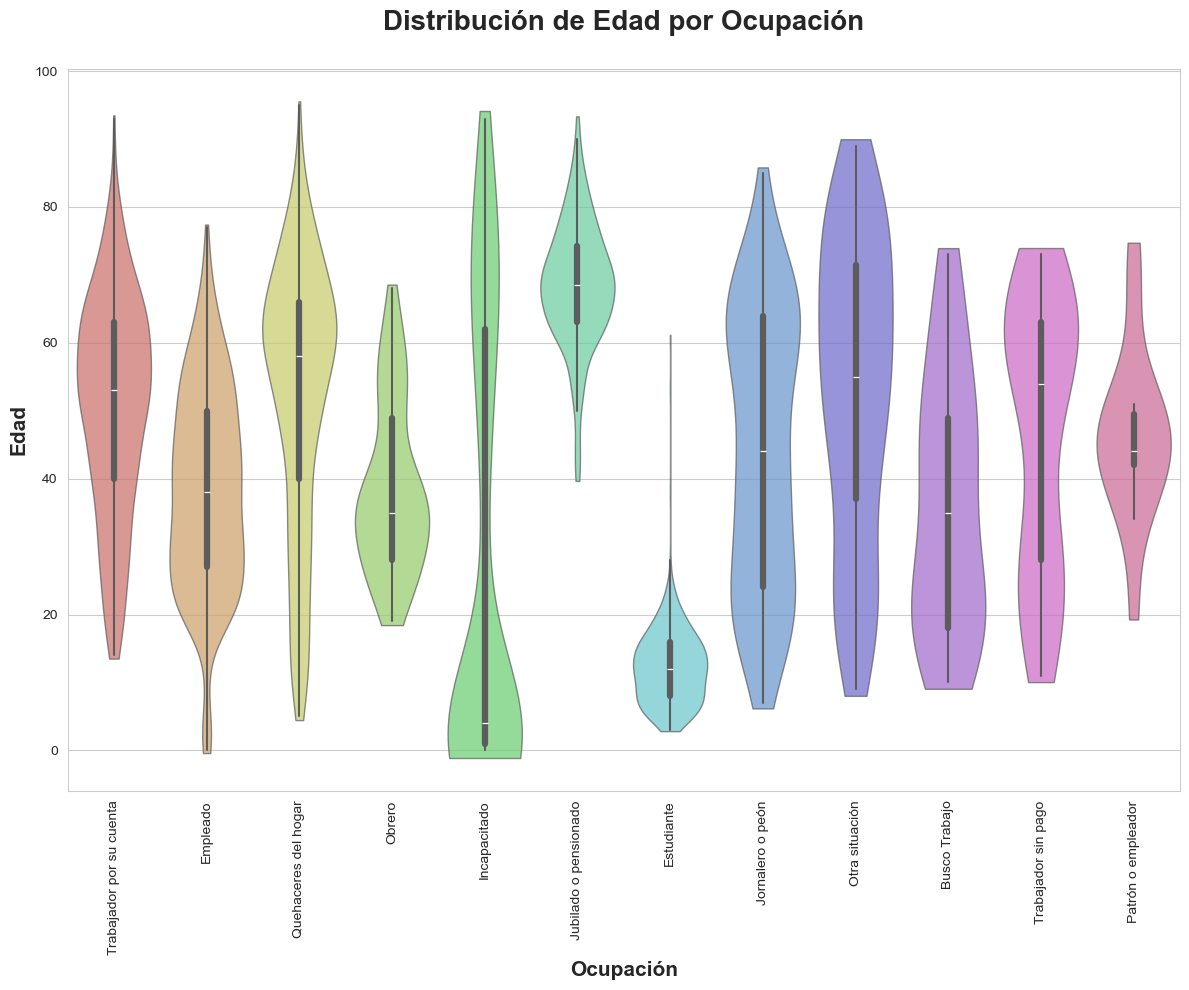

In [869]:

# Crear el gráfico de violín
plt.figure(figsize=(12, 10))
sns.violinplot(data=todas, x='Ocupacion', y='Edad', palette="hls", cut=0.1, alpha=0.7, linewidth=1)

# Mejorar etiquetas
plt.xticks(rotation=90)  # Rotar etiquetas de ocupación
plt.title('Distribución de Edad por Ocupación\n', fontsize=20, fontweight='bold')
plt.xlabel('Ocupación', fontsize=15, fontweight='bold')
plt.ylabel('Edad', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.savefig('violin-ocupacion-edad.svg')


# Mostrar el gráfico
plt.show()


In [828]:
print(todas[todas['Edad'] < 0])  # Buscar edades negativas


Empty DataFrame
Columns: [Ocupacion, Edad, Diabetes, Hipertensión, Infarto, Angina de Pecho, Insuficiencia Cardiaca, Embolia, Infección en Vías Urinarias, Cálculos Renales, Insuficiencia Renal]
Index: []


In [829]:
diabetessi = todas[todas['Embolia'] == 1]

C:\Users\herie\AppData\Local\Temp\ipykernel_20444\2433209079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diabetessi, x='Ocupacion', y='Edad', palette="Set2", cut=0.1, alpha=0.7, linewidth=1)
C:\Users\herie\AppData\Local\Temp\ipykernel_20444\2433209079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diabetessi, x='Ocupacion', y='Edad', palette="Set2", cut=0.1, alpha=0.7, linewidth=1)
C:\Users\herie\AppData\Local\Temp\ipykernel_20444\2433209079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diabetess

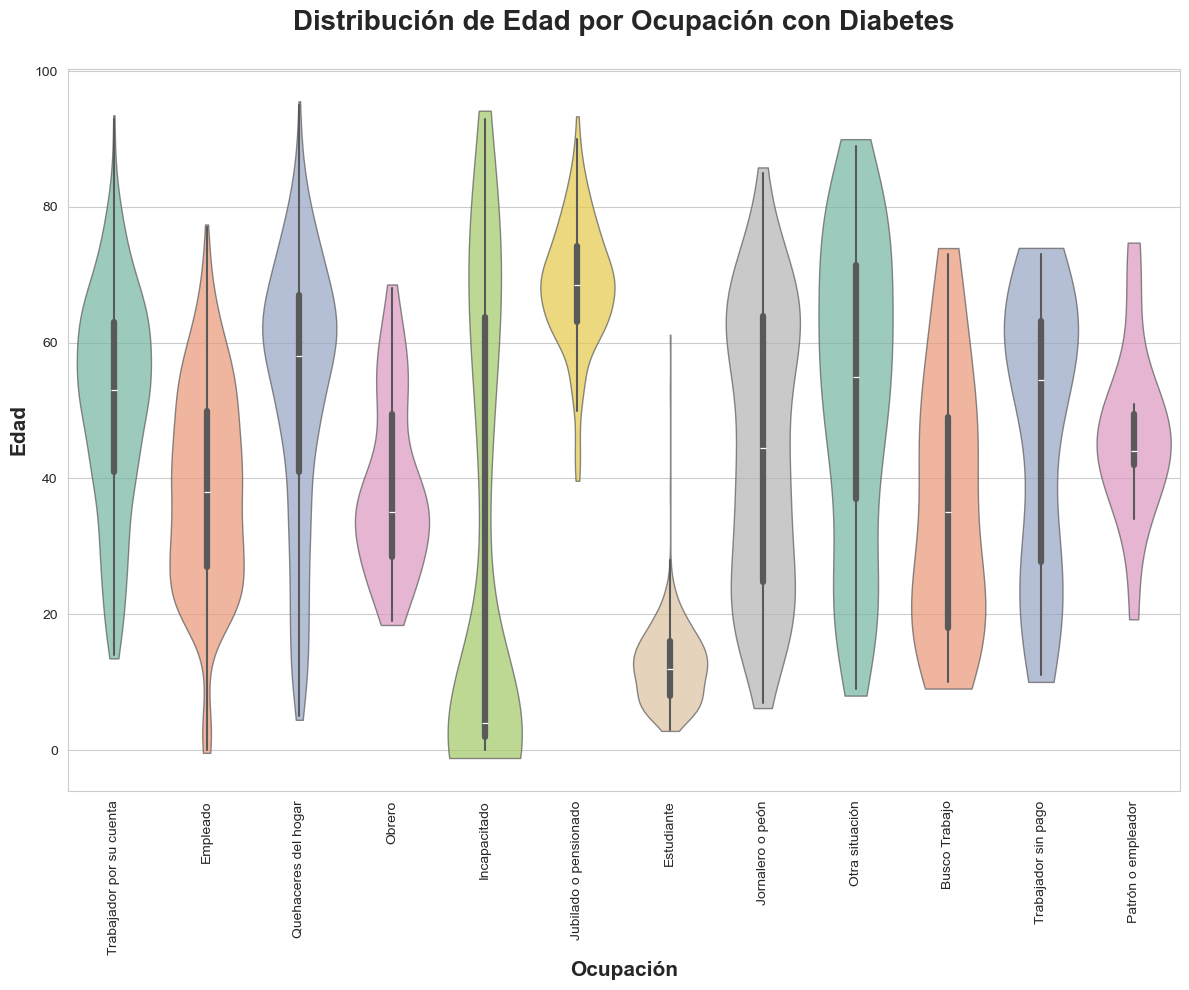

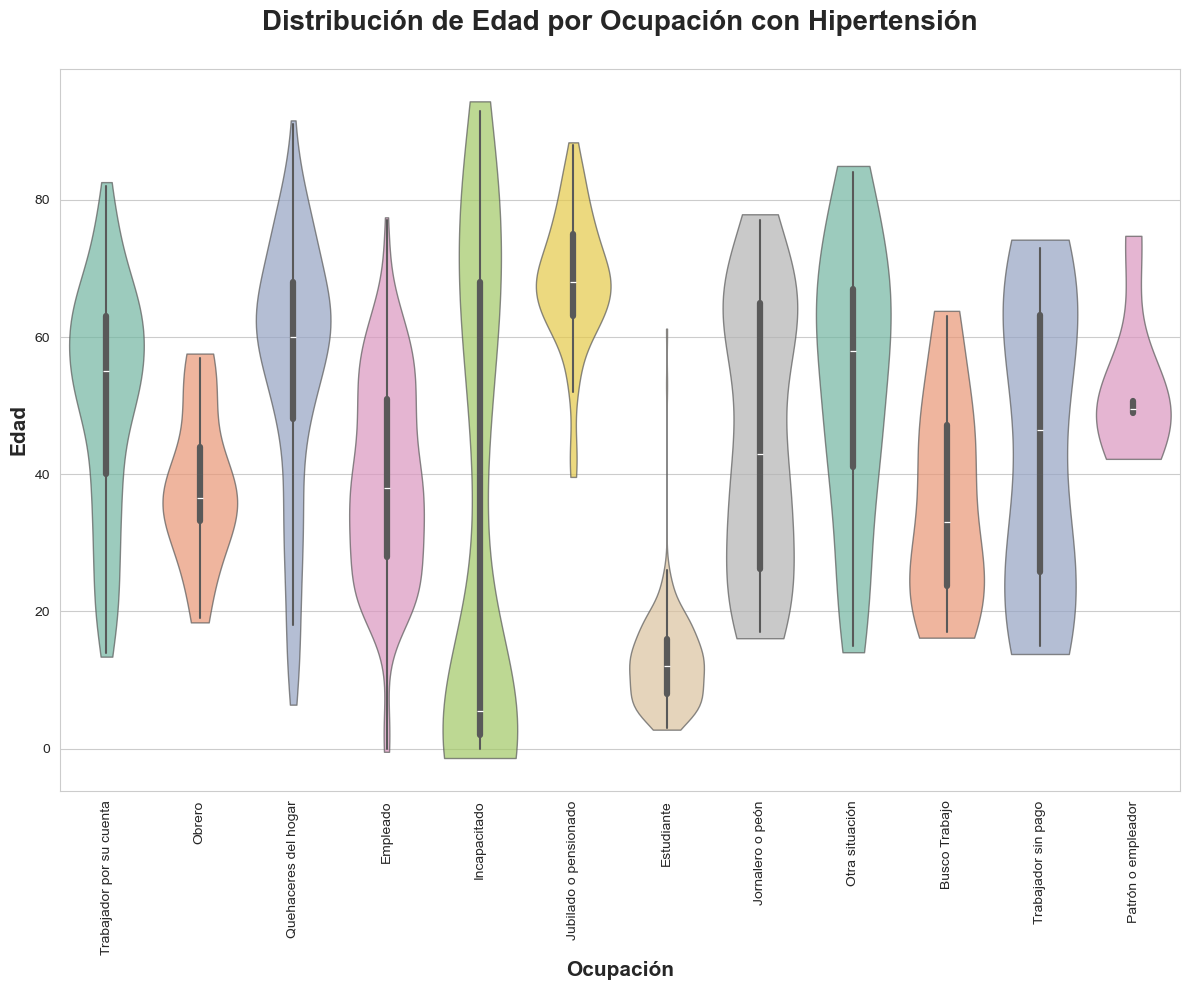

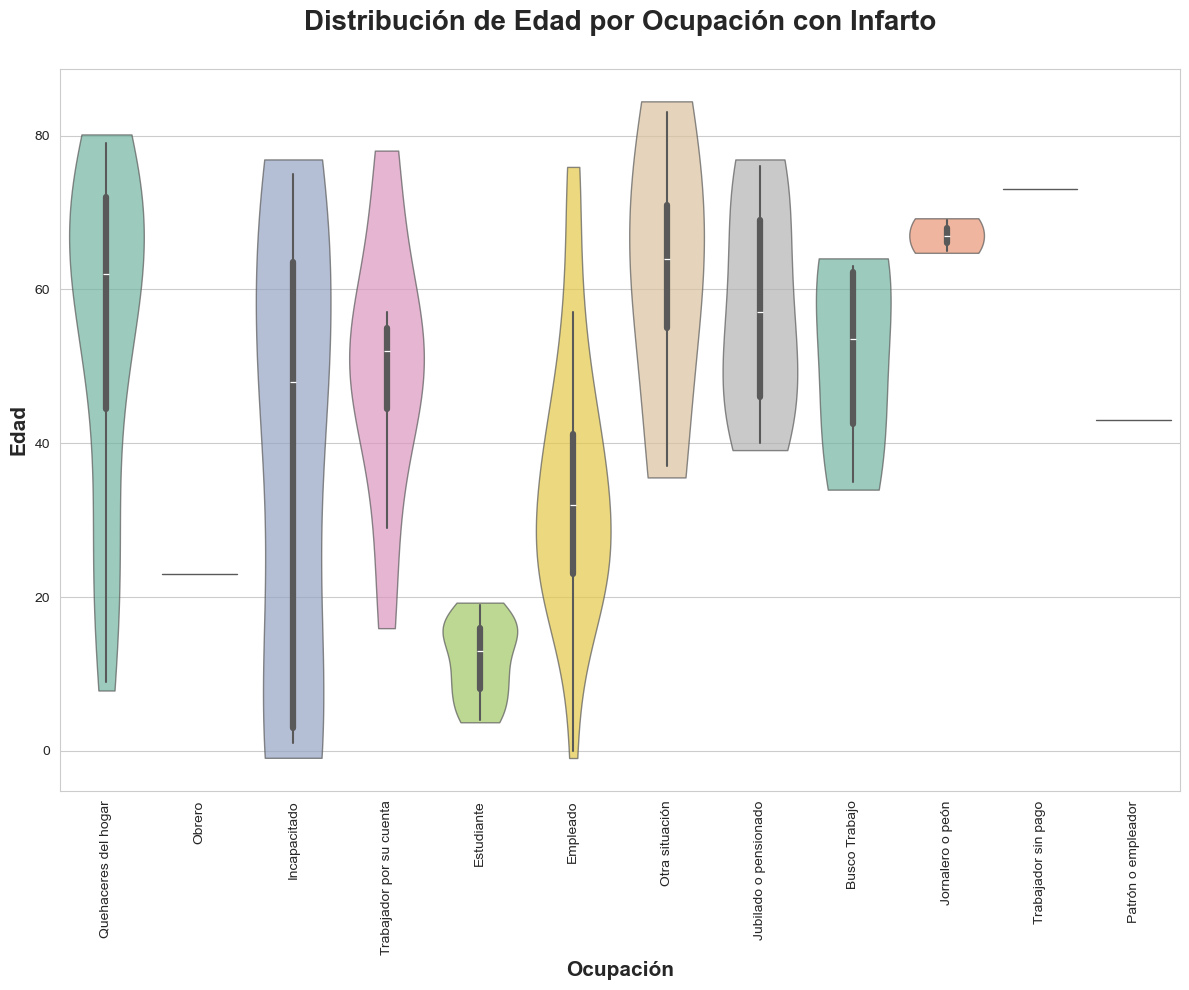

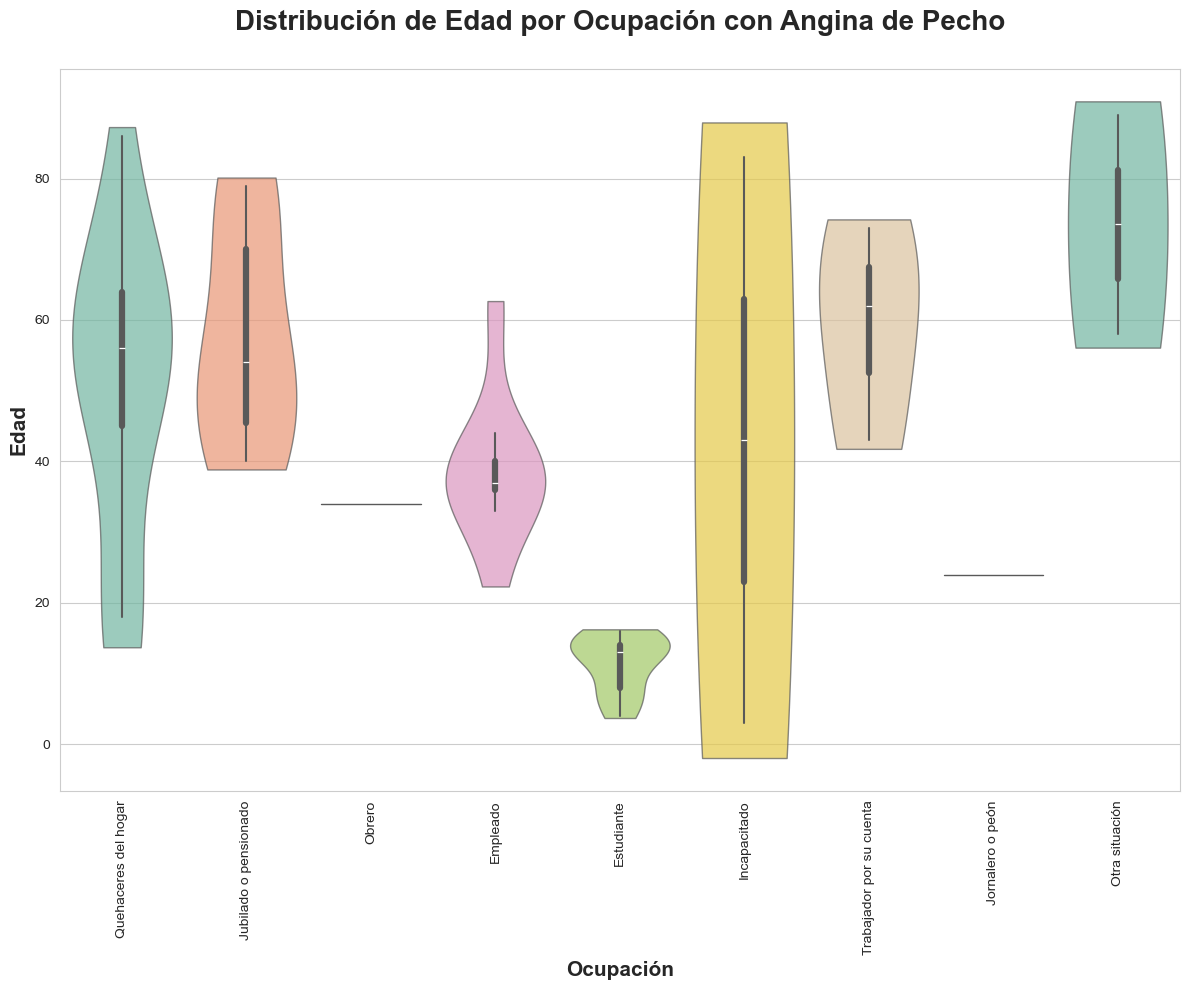

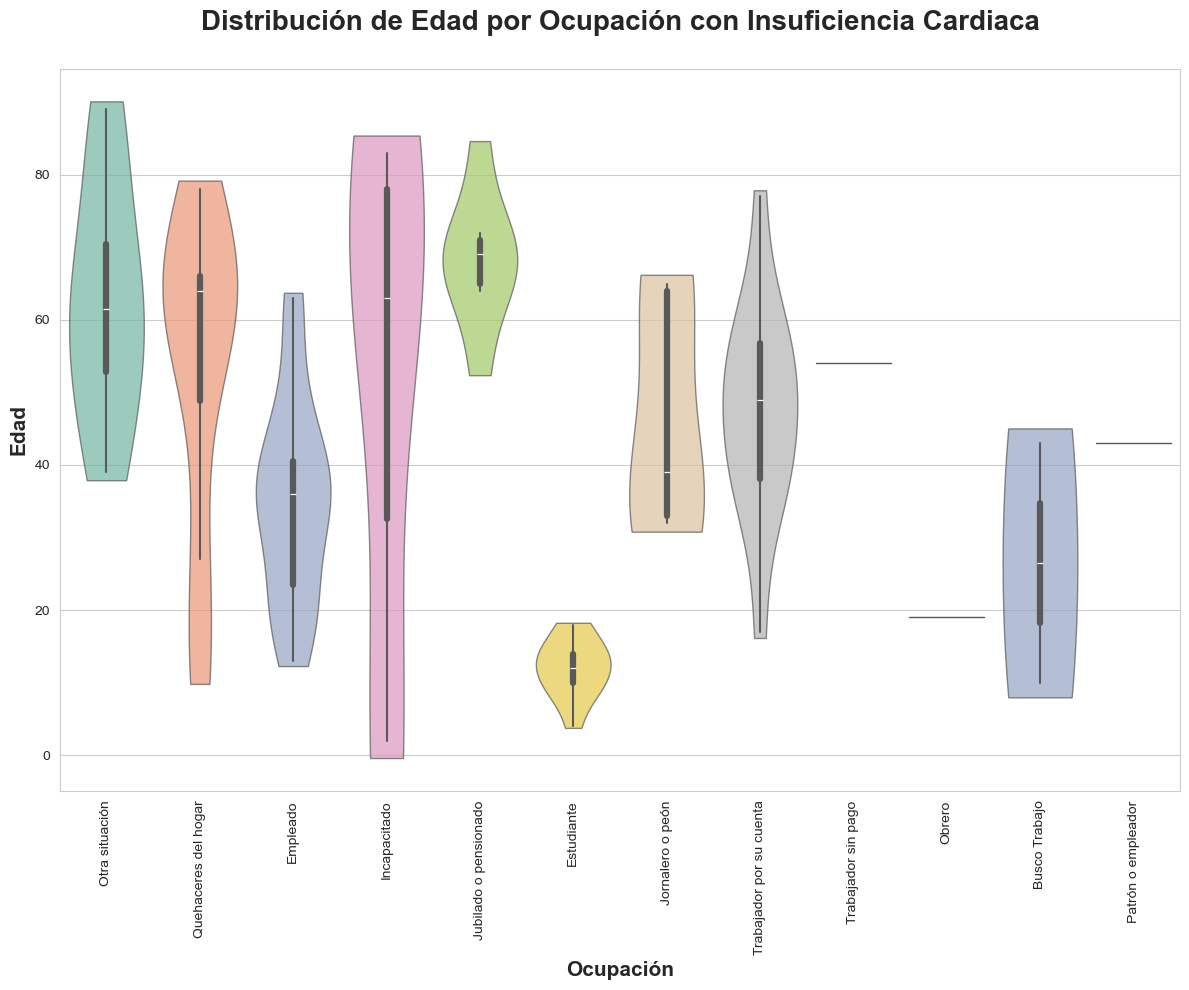

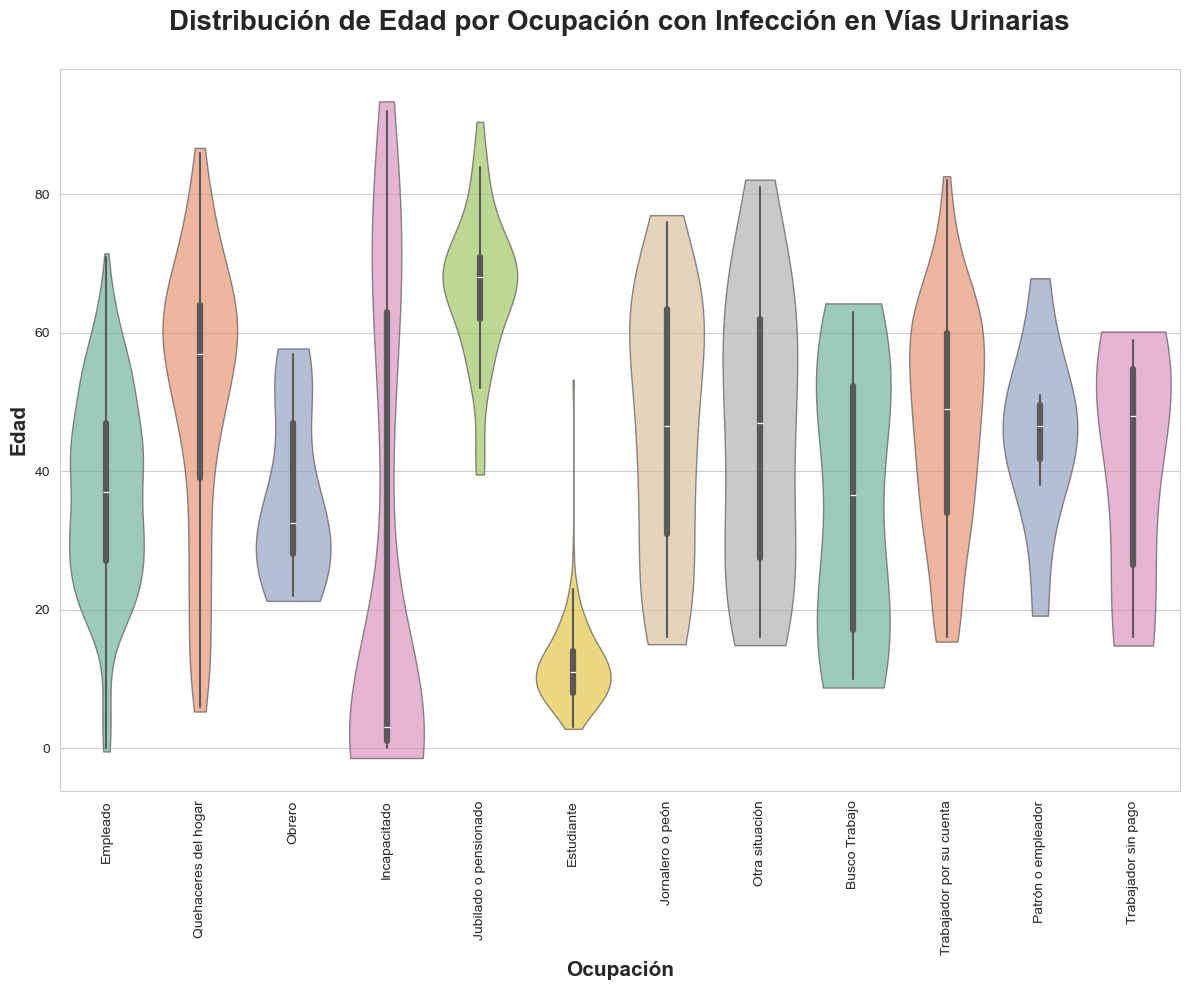

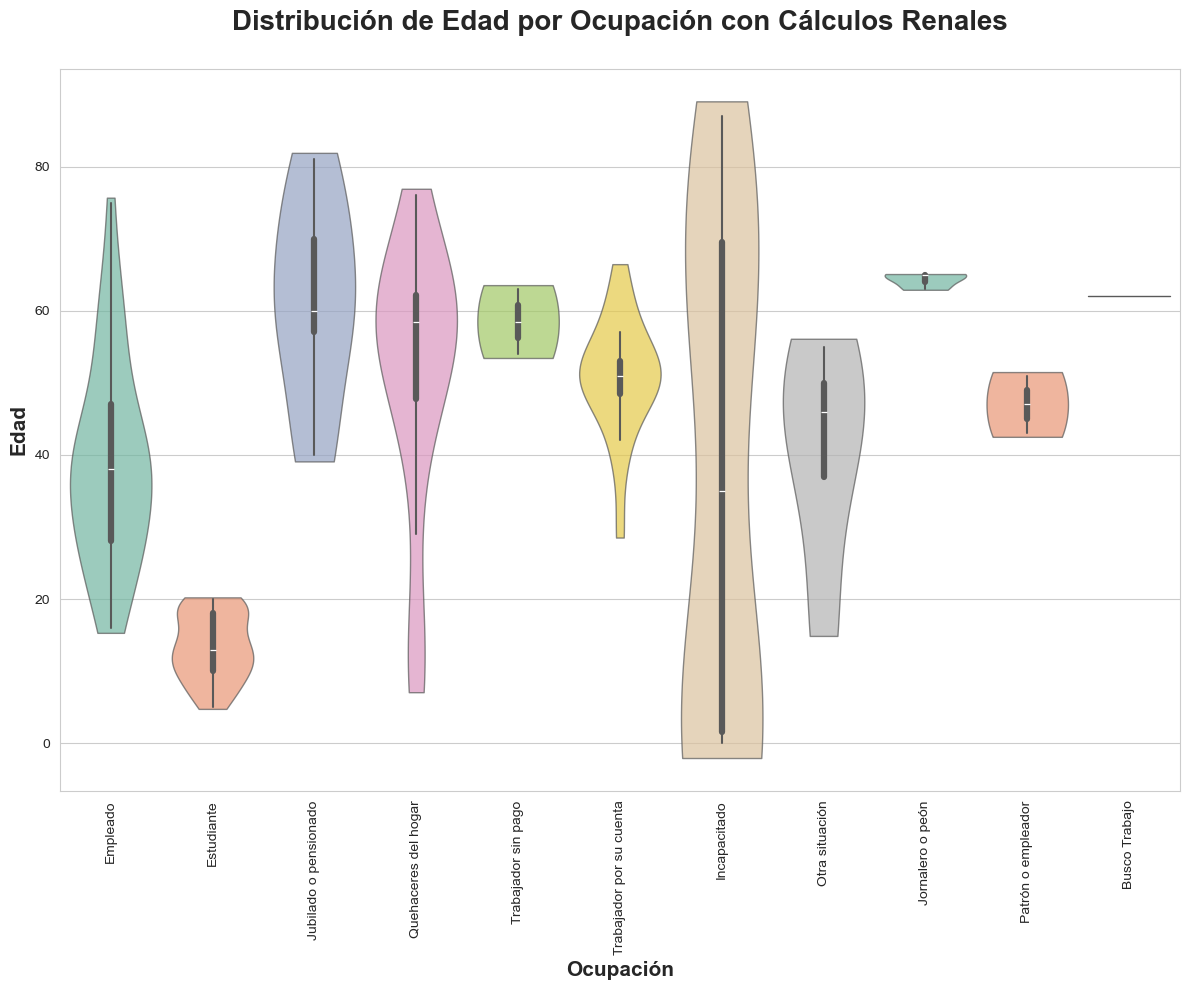

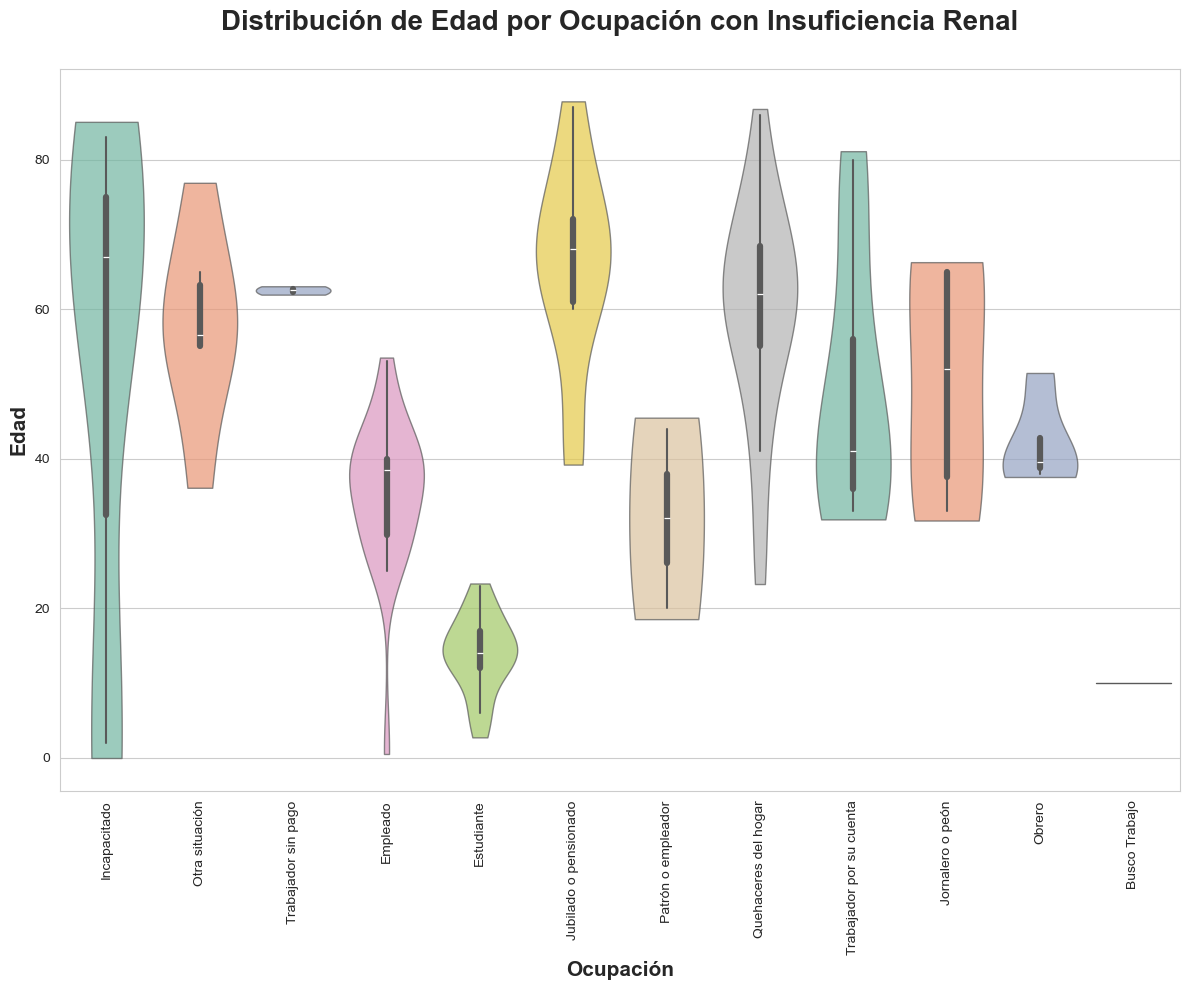

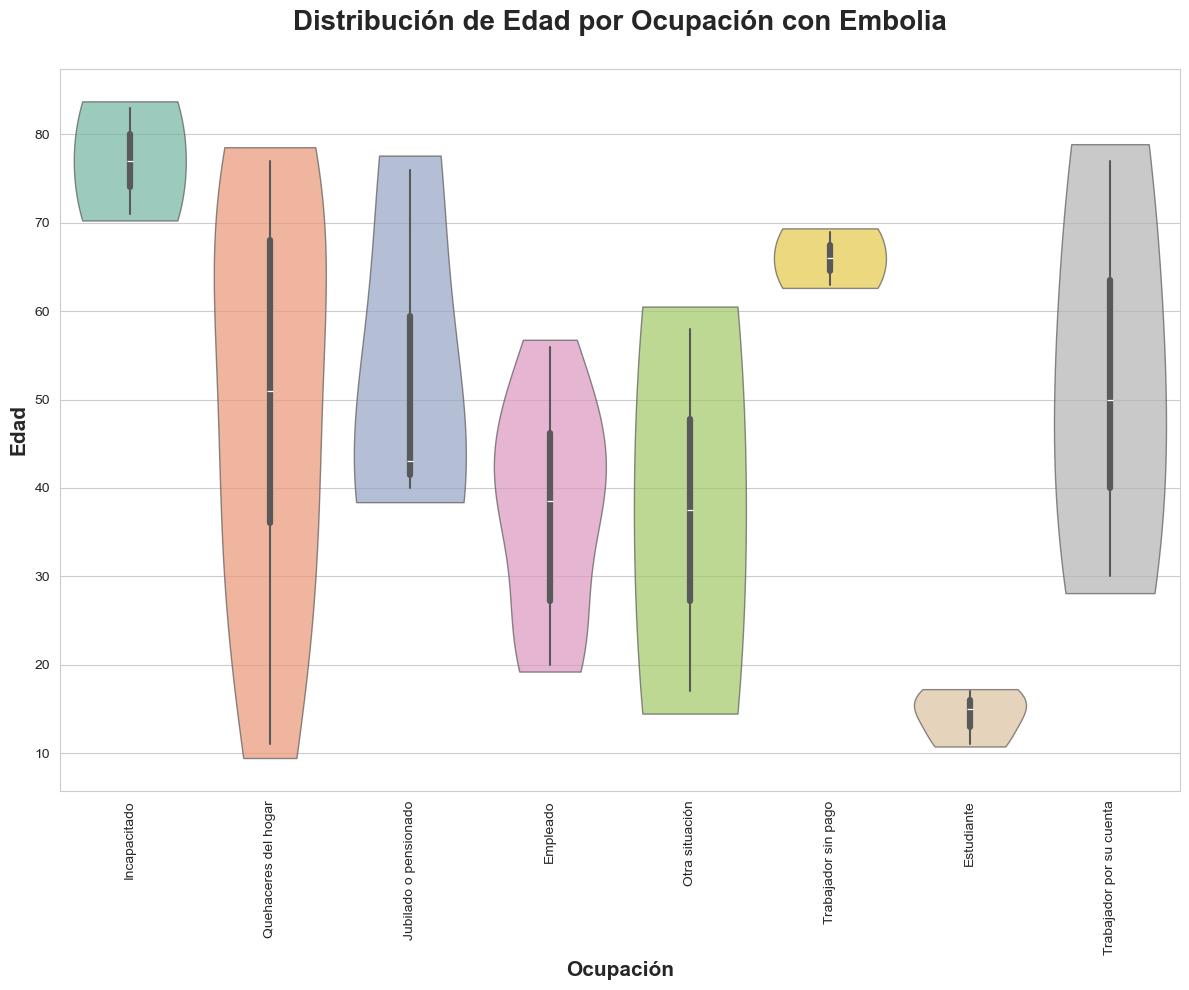

In [830]:
# todas.rename(columns={'h0324': 'Ocupacion', 'h0303': 'Edad', 'a0301': 'Diabetes', 'a0401': 'Hipertensión', 'a0502a': 'Infarto', 'a0502b': 'Angina de Pecho', 'a0502c': 'Insuficiencia Cardiaca', 'a0502d': 'Embolia', 'a0601a': 'Infección en Vías Urinarias', 'a0601b': 'Cálculos Renales', 'a0601c': 'Insuficiencia Renal'}, inplace=True)

enfermedades = ['Diabetes', 'Hipertensión', 'Infarto', 'Angina de Pecho', 'Insuficiencia Cardiaca', 'Infección en Vías Urinarias', 'Cálculos Renales', 'Insuficiencia Renal', 'Embolia']

for enfermedad in enfermedades:
    diabetessi = todas[todas[enfermedad] == 1]


    # Crear el gráfico de violín
    plt.figure(figsize=(12, 10))
    sns.violinplot(data=diabetessi, x='Ocupacion', y='Edad', palette="Set2", cut=0.1, alpha=0.7, linewidth=1)

    # Mejorar etiquetas
    plt.xticks(rotation=90)  # Rotar etiquetas de ocupación
    plt.title(f'Distribución de Edad por Ocupación con {enfermedad}\n', fontsize=20, fontweight='bold')
    plt.xlabel('Ocupación', fontsize=15, fontweight='bold')
    plt.ylabel('Edad', fontsize=15, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'violin-ocupacion-edad-{enfermedad}.svg')

In [831]:
enfermedad = 'Diabetes'

diabetessi = todas[todaueoas[enfermedad] == 1]

# Crear el gráfico de ridgeline
plt.figure(figsize=(12, 10))
joypy.joyplot(data=diabetessi, by='Ocupacion', column='Edad', colormap=plt.cm.Set2, fade=True, overlap=2, linewidth=0.5)

# Mejorar etiquetas
plt.title(f'Distribución de Edad por Ocupación con {enfermedad}\n', fontsize=20, fontweight='bold')
plt.xlabel('Edad', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.savefig(f'ridgeline-ocupacion-edad-{enfermedad}.svg')
plt.show()

NameError: name 'todaueoas' is not defined

In [ ]:

diabetessi = todas[todas[enfermedad] == 1]

In [ ]:
diabetessi = diabetessi[['Edad', 'Ocupacion', 'Diabetes']]

In [ ]:
# Filter the data to include only people with diabetes
diabetes_data = todas[todas['Diabetes'] == 1]

# Create the pivot table
pivot_table = diabetes_data.pivot_table(index='Edad', columns='Ocupacion', values='Diabetes', aggfunc='count', fill_value=0)

pivot_table

Ocupacion  Busco Trabajo  Empleado  Estudiante  Incapacitado  \
Edad                                                           
0.0                    0         2           0            23   
1.0                    0         6           0            19   
2.0                    0         8           0            22   
3.0                    0         0           3            22   
4.0                    0         3          15            11   
...                  ...       ...         ...           ...   
90.0                   0         0           0             1   
91.0                   0         0           0             0   
92.0                   0         0           0             1   
93.0                   0         0           0             1   
95.0                   0         0           0             0   

Ocupacion  Jornalero o peón  Jubilado o pensionado  Obrero  Otra situación  \
Edad                                                                         
0.0                       0                      0       0               0   
1.0                       0                      0       0               0   
2.0                       0                      0       0               0   
3.0                       0                      0       0               0   
4.0                       0                      0       0               0   
...                     ...                    ...     ...             ...   
90.0                      0                      1       0               0   
91.0                      0                      0       0               0   
92.0                      0                      0       0               0   
93.0                      0                      1       0               0   
95.0                      0                      0       0               0   

Ocupacion  Patrón o empleador  Quehaceres del hogar  Trabajador por su cuenta  \
Edad                                                                            
0.0                         0                     0                         0   
1.0                         0                     0                         0   
2.0                         0                     0                         0   
3.0                         0                     0                         0   
4.0                         0                     0                         0   
...                       ...                   ...                       ...   
90.0                        0                     0                         0   
91.0                        0                     2                         0   
92.0                        0                     0                         0   
93.0                        0                     0                         1   
95.0                        0                     1                         0   

Ocupacion  Trabajador sin pago  
Edad                            
0.0                          0  
1.0                          0  
2.0                          0  
3.0                          0  
4.0                          0  
...                        ...  
90.0                         0  
91.0                         0  
92.0                         0  
93.0                         0  
95.0                         0  

[95 rows x 12 columns]

In [ ]:
import joypy

for enfermedad in enfermedades:

    diabetessi = todas[todas[enfermedad] == 1]

    # Crear el gráfico de ridgeline
    plt.figure(figsize=(12, 10))
    joypy.joyplot(data=diabetessi, by='Ocupacion', column='Edad', colormap=plt.cm.Set2, fade=True, overlap=2)

    # Mejorar etiquetas
    plt.title(f'\nDistribución de Edad por Ocupación con {enfermedad}', fontsize=12, fontweight='bold')
    plt.xlabel('Edad', fontsize=15, fontweight='bold')

    plt.savefig(f'ridgeline-ocupacion-edad-{enfermedad}.svg')
    plt.show()


AttributeError: module 'matplotlib.cm' has no attribute 'hls'

<Figure size 1200x1000 with 0 Axes>

In [ ]:
todas['Edad'].describe()

count    23899.000000
mean        34.100674
std         21.542817
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max         99.000000
Name: Edad, dtype: float64

# **Final**

In [ ]:
numrelation = pd.concat([tabla_contingencia['Si'], tabla_contingenciah['Si'], tabla_contingenciainf['Si'], tabla_contingenciainf['Si'], tabla_contingenciains['Si'], tabla_contingenciaemb['Si'], tabla_contingenciaang['Si'], tabla_contingenciaren['Si'], tabla_contingenciacal['Si']], axis=1)

In [ ]:
numrelation.columns = ['Diabetes', 'Hipertension', 'Infarto', 'Infeccion', 'Calculos Renales', 'Embolia', 'Angina', 'Insuficiencia Cardiaca', 'Enfermedad Renal']

In [ ]:
numrelation

Infarto  Infeccion  Hipertension  Diabetes  \
Ocupacion                                                              
Empleado                     1442       1442          1226       751   
Estudiante                   1094       1094           768       453   
Quehaceres del hogar          957        957           897       577   
Trabajador por su cuenta      650        650           572       354   
Incapacitado                  363        363           267       182   
Jubilado o pensionado         165        165           246       160   
Jornalero o peón              160        160           141        92   
Obrero                        126        126            91        51   
Otra situación                 81         81           110        63   
Trabajador sin pago            76         76            67        40   
Busco Trabajo                  52         52            55        33   
Patrón o empleador             26         26            27        15   

                          Enfermedad Renal  Calculos Renales  Angina  \
Ocupacion                                                              
Empleado                               259               119      85   
Estudiante                             188                91      69   
Quehaceres del hogar                   155                71      63   
Trabajador por su cuenta               131                51      38   
Incapacitado                            56                27      20   
Jubilado o pensionado                   29                23      22   
Jornalero o peón                        27                18      12   
Obrero                                   7                 4      12   
Otra situación                          20                12      11   
Trabajador sin pago                     12                 3       4   
Busco Trabajo                            9                 7       6   
Patrón o empleador                       6                 3       1   

                          Insuficiencia Cardiaca  Embolia  
Ocupacion                                                  
Empleado                                      97       52  
Estudiante                                    45       47  
Quehaceres del hogar                          52       37  
Trabajador por su cuenta                      20       23  
Incapacitado                                  19       17  
Jubilado o pensionado                         19       12  
Jornalero o peón                              10        9  
Obrero                                         6        3  
Otra situación                                13        9  
Trabajador sin pago                            5        8  
Busco Trabajo                                  4        6  
Patrón o empleador                             4        1

In [ ]:
chi2, p, dof, expected = chi2_contingency(numrelation)

# Print the results
print(f'Chi2: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi2: 231.7837135481916
p-value: 6.917502517747295e-15
Degrees of freedom: 88
Expected frequencies:
[[7.65518298e+02 1.23405638e+03 1.43434536e+03 1.43434536e+03
  1.18515825e+02 6.18823886e+01 9.47574075e+01 8.12206350e+01
  2.48358336e+02]
 [5.26757155e+02 8.49160668e+02 9.86980566e+02 9.86980566e+02
  8.15513604e+01 4.25815961e+01 6.52030690e+01 5.58883449e+01
  1.70896674e+02]
 [5.38366514e+02 8.67875574e+02 1.00873293e+03 1.00873293e+03
  8.33486952e+01 4.35200646e+01 6.66400989e+01 5.71200848e+01
  1.74663116e+02]
 [3.48140881e+02 5.61221695e+02 6.52308717e+02 6.52308717e+02
  5.38983898e+01 2.81427490e+01 4.30935844e+01 3.69373580e+01
  1.12947908e+02]
 [1.83791530e+02 2.96281763e+02 3.44368684e+02 3.44368684e+02
  2.84541921e+01 1.48572005e+01 2.27500883e+01 1.95000757e+01
  5.96277825e+01]
 [1.17632174e+02 1.89629347e+02 2.20406441e+02 2.20406441e+02
  1.82115491e+01 9.50906062e+00 1.45607491e+01 1.24806421e+01
  3.81635960e+01]
 [8.79793549e+01 1.41827419e+02 1.64846197e+02 1

In [ ]:
# Calculate the sum of each column
numrelation.loc['Sum of Issues'] = numrelation.sum()

# Sort the DataFrame by the new row
numrelation = numrelation.sort_values(by='Sum of Issues', axis=1, ascending=False)

# Drop the row with the sum of issues
numrelation.drop('Sum of Issues', inplace=True)

In [ ]:
# Calculate the sum of each row
numrelation['Sum of Issues'] = numrelation.sum(axis=1)

# Sort the DataFrame by the new column
numrelation = numrelation.sort_values(by='Sum of Issues', axis=0, ascending=False)

# Drop the column with the sum of issues
numrelation.drop('Sum of Issues', axis=1, inplace=True)


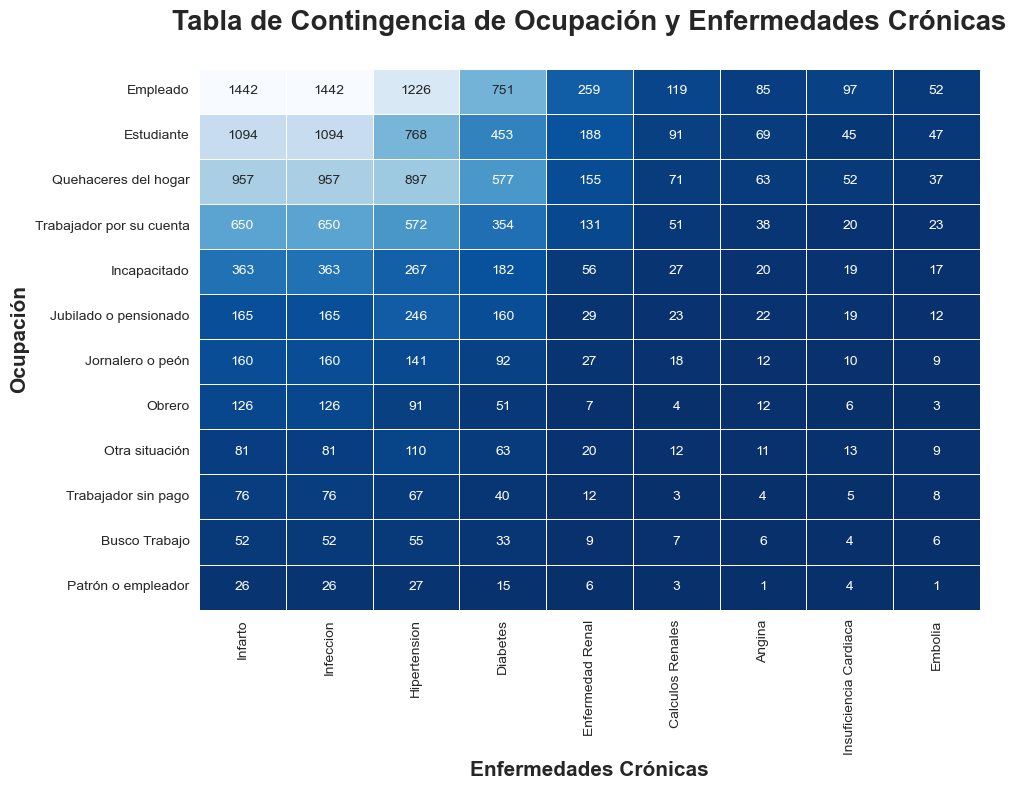

In [ ]:

# Plot the sorted DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(numrelation, annot=True, fmt='d', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Tabla de Contingencia de Ocupación y Enfermedades Crónicas\n', fontsize=20, fontweight='bold')
plt.xlabel('Enfermedades Crónicas', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-fiuean.svg')
plt.show()

# prop

In [ ]:
relation = pd.concat([diabetes_proportion['Si'], hipertension_prop['Si'], infarto_prop['Si'], angina_prop['Si'], insuficiencia_prop['Si'], embolia_prop['Si'], infeccion_prop['Si'], calculos_prop['Si'], renal_prop['Si']], axis=1)

In [ ]:
# rename the columns
relation.columns = ['Diabetes', 'Hipertension', 'Infarto', 'Angina de Pecho', 'Insuficiencia Cardiaca', 'Embolia', 'Infeccion de Vías Urinarias', 'Calculos Renales', 'Insuficiencia Renal']

In [ ]:
# Calculate the sum of each column
relation.loc['Sum of Issues'] = relation.sum()

# Sort the DataFrame by the new row
relation = relation.sort_values(by='Sum of Issues', axis=1, ascending=False)

# Drop the row with the sum of issues
relation.drop('Sum of Issues', inplace=True)


In [ ]:
# Calculate the sum of each row
relation['Sum of Issues'] = relation.sum(axis=1)

# Sort the DataFrame by the new column
relation = relation.sort_values(by='Sum of Issues', axis=0, ascending=False)

# Drop the column with the sum of issues
relation.drop('Sum of Issues', axis=1, inplace=True)


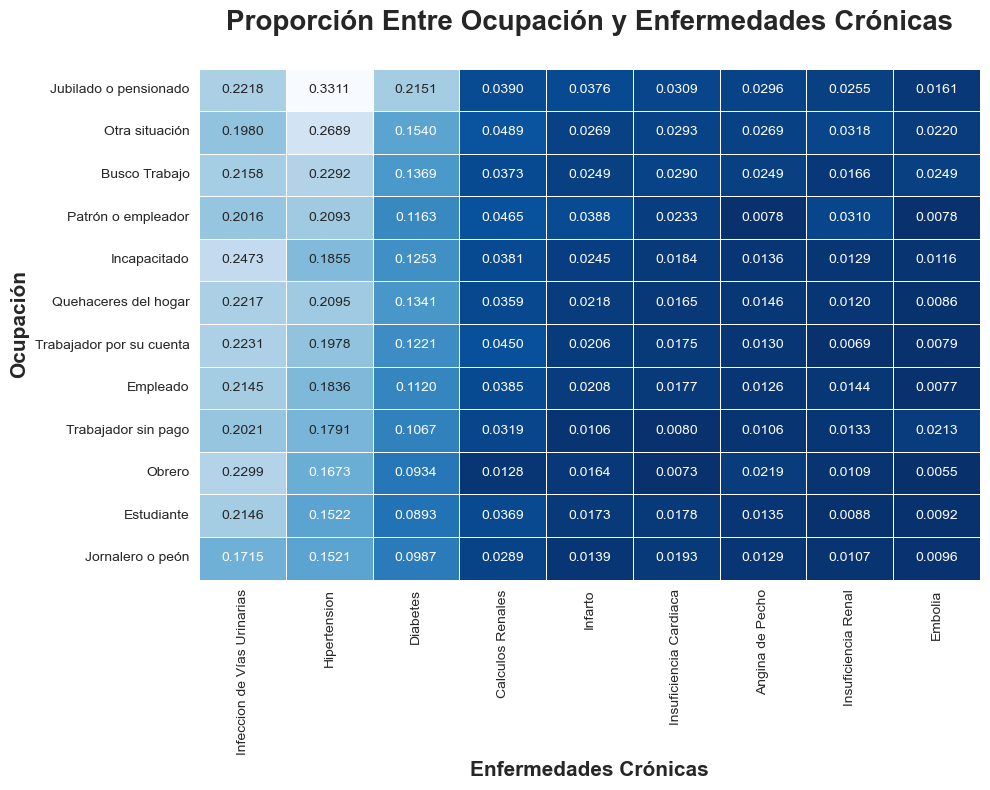

In [ ]:

# Plot the sorted DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(relation, annot=True, fmt='.4f', cmap='Blues_r', cbar=False, linecolor='white', linewidth=0.5)
plt.title('Proporción Entre Ocupación y Enfermedades Crónicas\n', fontsize=20, fontweight='bold')
plt.xlabel('Enfermedades Crónicas', fontsize=15, fontweight='bold')
plt.ylabel('Ocupación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('tabla-contingencia-ocupacion-fin.svg')
plt.show()